# Marketing_EDA

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [43]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # window용
matplotlib.rcParams['font.size'] = 11  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

In [44]:
df = pd.read_csv('./data/2022-07-04_bobjo_db.csv', parse_dates=["completed_at","marketing_start_at"])
df.head()

,id,customer_id,course_id,type,state,course_title,category_title,format,completed_at,transaction_amount,coupon_title,coupon_discount_amount,sale_price,pg,method,subcategory_title,marketing_start_at,month,completed_ymd,hour
0,970634,504760,201435,ORDER,CANCELLED,올인원 패키지 : 알고리즘 기술면접 완전 정복,프로그래밍,올인원,2021-03-28 15:00:11,90500,미적용,0,110500,COMM,VBANK,개발자 커리어,2018-11-11,3,2021-03-28,15
1,970650,432862,203178,ORDER,CANCELLED,초격차 패키지 : 한번에 끝내는 영상 촬영과 편집,영상/3D,올인원,2021-03-28 15:16:53,96000,미적용,0,116000,COMM,CARD,영상 편집,2020-12-02,3,2021-03-28,15
2,970657,72297,204246,PAYMENT,COMPLETED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,[10% 할인] 시크릿코드 실무 완성편,19090,190900,COMM,CARD,프로그래밍,2021-03-04,3,2021-03-28,15
3,970656,72297,204246,ORDER,CANCELLED,시크릿코드 : 프론트엔드 실무 완성편,프로그래밍,스쿨 온라인,2021-03-28 15:21:43,171810,미적용,0,190900,COMM,CARD,프로그래밍,2021-03-04,3,2021-03-28,15
4,970658,478028,201797,PAYMENT,COMPLETED,올인원 패키지 : 직장인 필수 스킬 3종 세트 MAX,업무 생산성,올인원,2021-03-28 15:21:54,97500,[웰컴쿠폰] 올인원 패키지 2만원 할인 쿠폰,20000,117500,COMM,CARD,PPT/보고서,2019-11-14,3,2021-03-28,15


# 매출 분석

## 매출 정의

In [45]:
df['state'].unique()

array(['CANCELLED', 'COMPLETED', 'PENDING', 'DELETED', 'REQUESTED'],
      dtype=object)

## 총 매출 구하기

In [46]:
prc = df[(df['type'] != 'ORDER') & (df['state'] == 'COMPLETED')]

In [47]:
# 총매출 구하기
total_rev = prc['transaction_amount'].sum()

# 시간대별 매출 그래프

In [48]:
# index를 completed_at으로 두고 시간별 매출

prc_hour = prc.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]

<AxesSubplot:xlabel='hour', ylabel='count'>

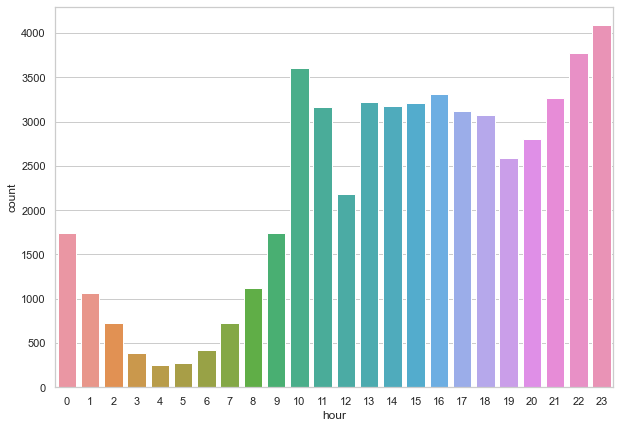

In [49]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
sns.countplot(data=prc, x = 'hour')

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


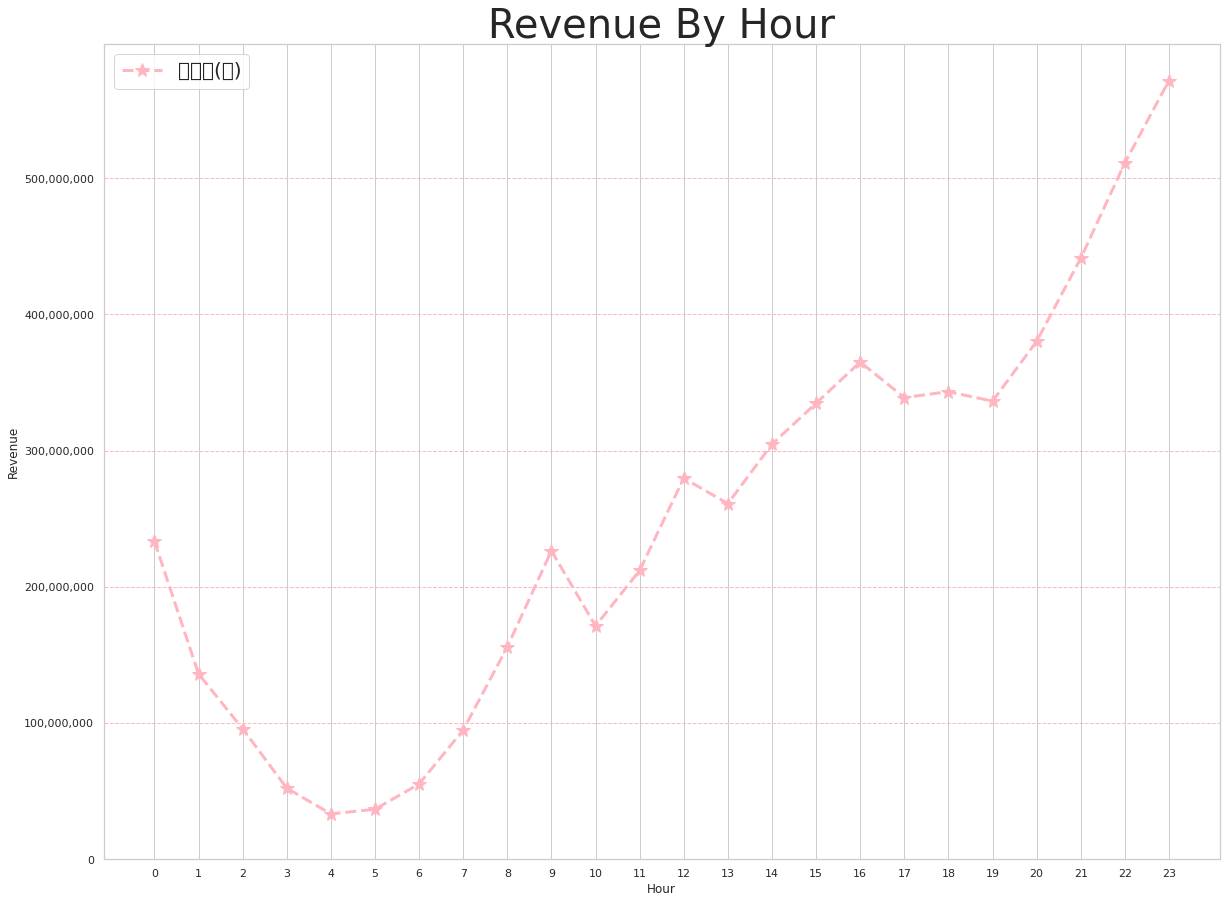

In [50]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # window용
matplotlib.rcParams['font.size'] = 11  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

plt.figure(figsize=(20,15))
plt.plot(prc_hour, label='매출액(억)', marker = '*', markersize=15, color = 'lightpink',ls = '--',lw = 3)
plt.yticks([0, 100000000, 200000000, 300000000, 400000000 ,500000000], [0, '100,000,000', '200,000,000', '300,000,000', '400,000,000' ,'500,000,000'])
plt.xticks([i for i in range(24)])
plt.title('Revenue By Hour', fontsize=40)
plt.xlabel('Hour', )
plt.ylabel('Revenue')
plt.legend(loc='upper left', fontsize=20)
plt.grid(axis='y', color = 'lightpink', ls = '--')

plt.show()

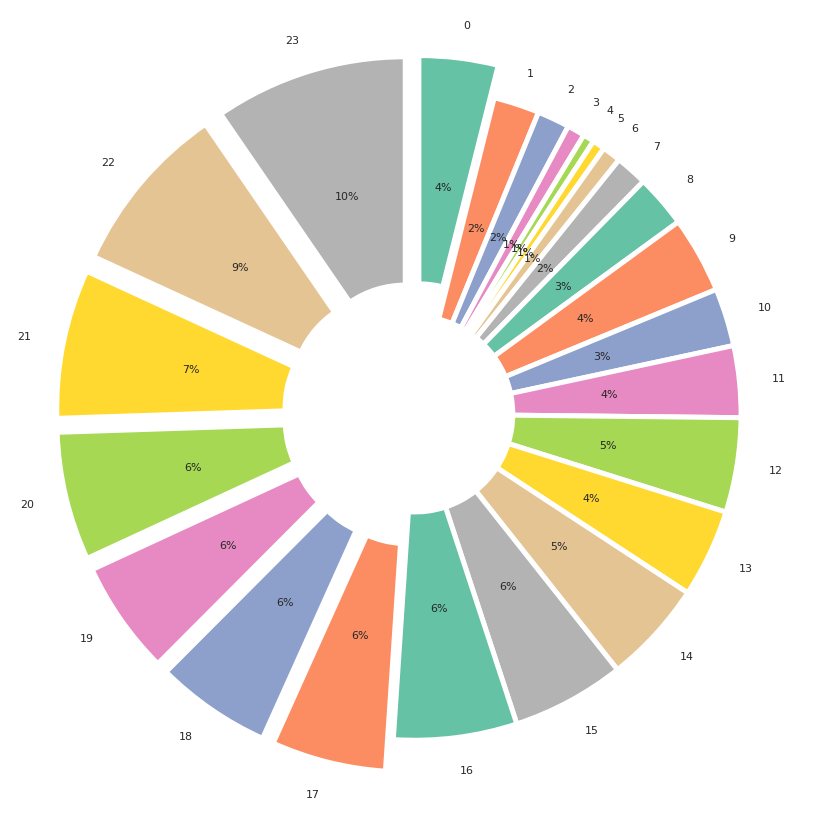

In [51]:
labels = [i for i in range(0,24)]
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
colors = sns.color_palette("Set2")
explode = [0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 
           0, 0, 0, 0, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10, 0.10]

plt.figure(figsize=(15,15))
plt.pie(prc_hour.transaction_amount,
        labels = labels,
        counterclock=False,
        autopct='%0.0f%%',
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       
       
       )
plt.show()

In [52]:
prc_dweek = prc.set_index('completed_at').groupby(lambda date: date.dayofweek).sum()[['transaction_amount']]

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_fi

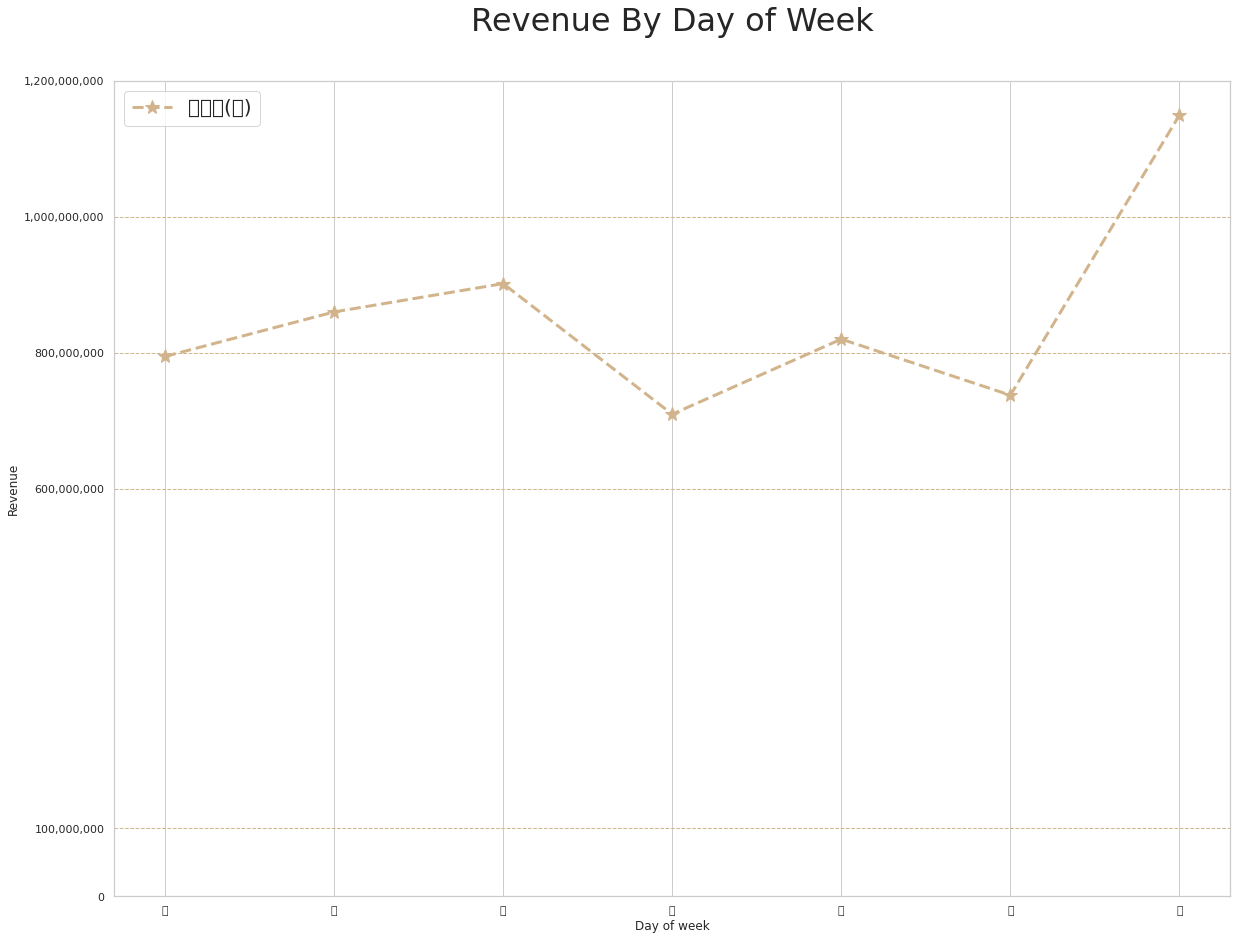

In [53]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # window용
matplotlib.rcParams['font.size'] = 11  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

plt.figure(figsize=(20,15))
plt.plot(prc_dweek, marker='*', label = '매출액(억)', ls = '--', color = 'tan',linewidth = 3,ms = 15)
plt.yticks([0, 100000000, 600000000, 800000000, 1000000000 ,1200000000], 
           ['0','100,000,000', '600,000,000', '800,000,000', '1,000,000,000' ,'1,200,000,000'])
plt.xticks([0,1,2,3,4,5,6],['월','화','수','목','금','토','일'])

plt.title("Revenue By Day of Week", fontsize=32, pad=50)
plt.xlabel('Day of week', )
plt.ylabel('Revenue')
plt.grid(axis='y',color ='tan', ls='--')
plt.set_facecolor = 'lightgray'
plt.legend(loc = 'upper left', fontsize =20)

plt.show()

In [54]:
prc_days = prc.groupby('completed_ymd')['transaction_amount'].sum()

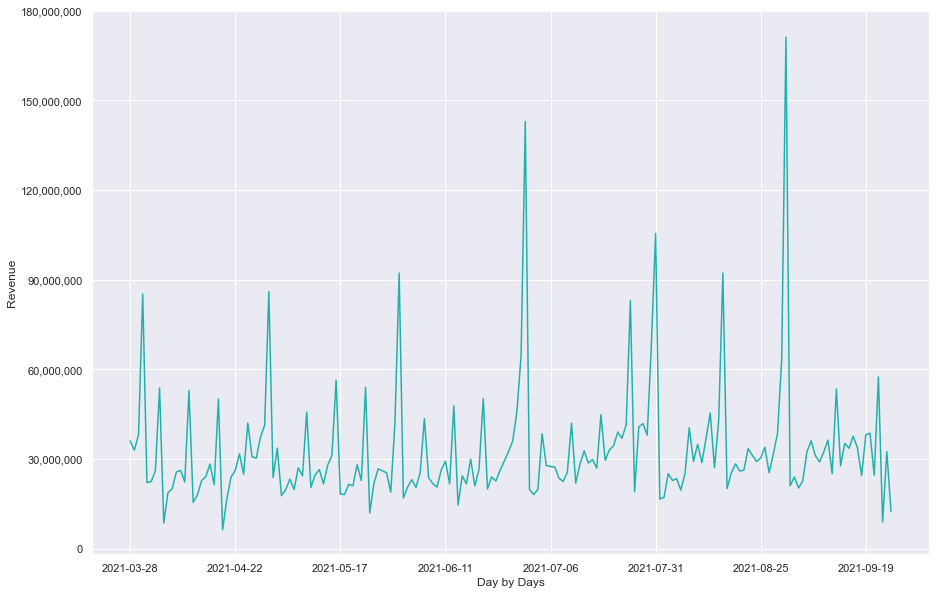

In [55]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # window용
matplotlib.rcParams['font.size'] = 11  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")

prc_days.plot(color='#20B2AA')
plt.xlabel('Day by Days')
plt.ylabel('Revenue')
plt.yticks([0, 30000000, 60000000, 90000000, 120000000, 150000000 ,180000000], 
           ['0','30,000,000','60,000,000', '90,000,000', '120,000,000', '150,000,000' ,'180,000,000'])
plt.show()

In [56]:
prc_day = prc.set_index('completed_at').groupby(lambda date: date.day).sum()[['transaction_amount']]

In [57]:
prc_day['transaction_amount'].max() 

454108581

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50529 (\N{HANGUL SYLLABLE AEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50613 (\N{HANGUL SYLLABLE EOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


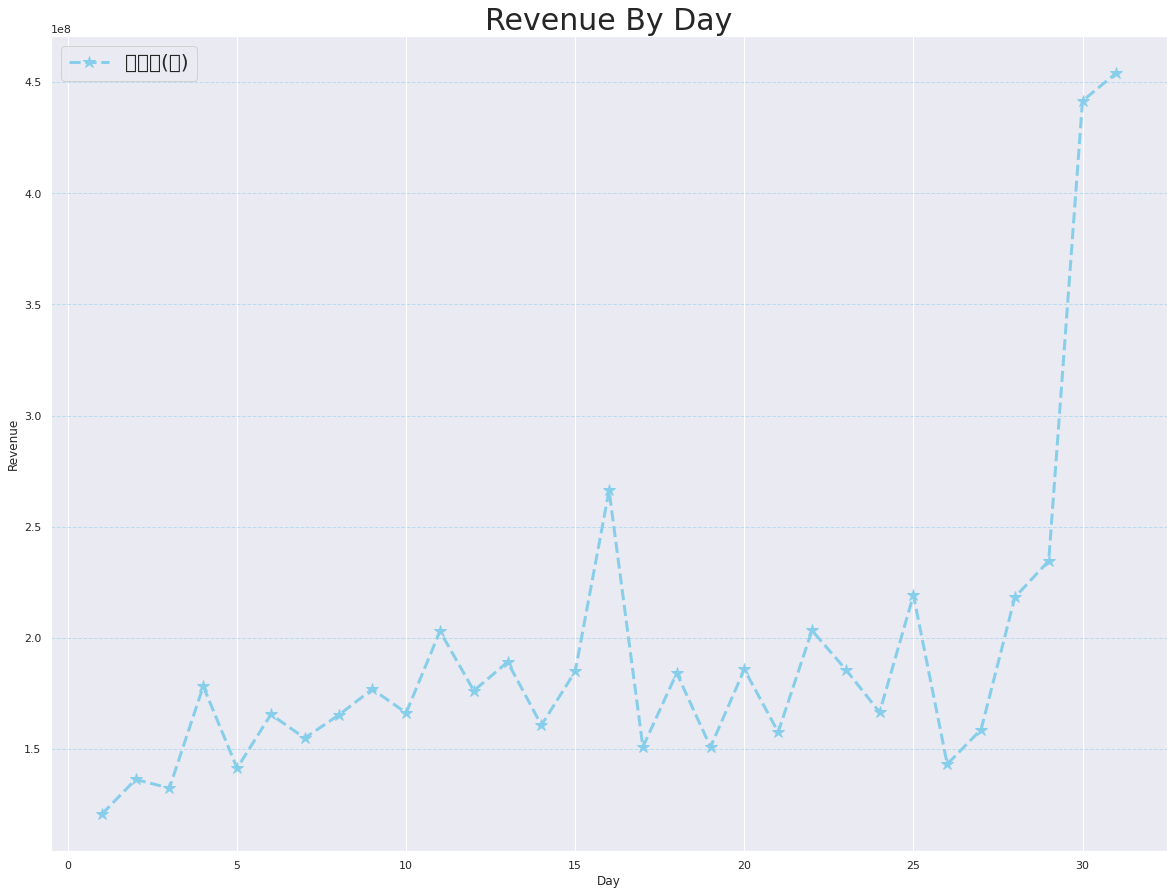

In [58]:
matplotlib.rcParams['font.family'] = 'Malgun Gothic'  # window용
matplotlib.rcParams['font.size'] = 11  # 글자 크기
matplotlib.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결

plt.figure(figsize=(20,15))
plt.plot(prc_day, marker = '*',ms=12, ls='--',lw=3, color = 'skyblue',label='매출액(억)')
plt.title("Revenue By Day", fontsize=30)
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.grid(axis='y',color='skyblue',ls='--',alpha=0.5)
plt.legend(loc='upper left', fontsize=20)
plt.show()

### 월별 매출 그래프

In [59]:
prc_month = prc.set_index('completed_at').groupby(lambda date: date.month).sum()[['transaction_amount']]

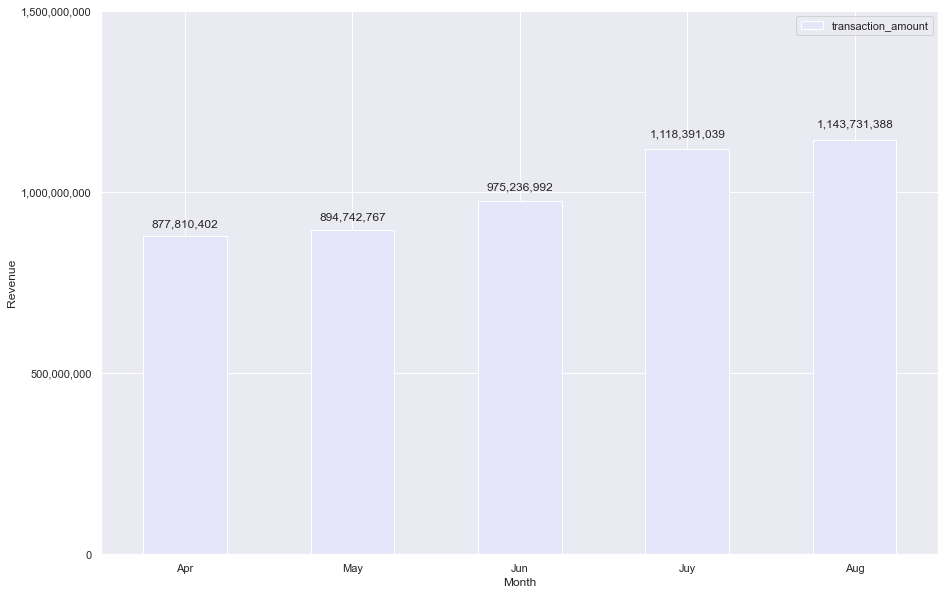

In [60]:
sns.set_theme(style="darkgrid")
my_colors = ['#90EE90', '#90EE90', '#8FBC8F','#3CB371', '#2E8B57', '#6B8E23']
rev_m_g = prc_month.plot.bar(y='transaction_amount',
                         rot=0,
                         color='lavender',
                         figsize=(15,10))
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.yticks([ 0, 500000000, 1000000000 ,1500000000],
           ['0','500,000,000', '1,000,000,000', '1,500,000,000',])
plt.xlim(0.5,5.5)
plt.xticks([1, 2, 3 ,4 ,5 ],
           ['Apr', 'May', 'Jun', 'Juy', 'Aug'])
for p in rev_m_g.patches:
    left, bottom, width, height = p.get_bbox().bounds
    rev_m_g.annotate(format(int(height), ','), (left+width/2, height*1.03), ha='center')
plt.show()

# 강의 분석

## 전체 강의 수

### 판매수 TOP 10 강의

In [61]:
# Top 10 강의 판매건 수 
course_sales_count = prc[prc.type == 'PAYMENT'].course_title.value_counts()
course_sales_count = pd.DataFrame(course_sales_count)
course_sales_count.columns = ['sales_count']

### 매출액 TOP 10 강의

In [62]:
# Top 10 강의 판매건 수 
course_prc = prc.groupby('course_title').sum()['transaction_amount'].sort_values(ascending=False)
course_prc = pd.DataFrame(course_prc)
course_prc.columns = ['course_prc']

### 강의당 평균 매출 금액

In [63]:
course_prc_plus = course_prc[course_prc > 0].dropna()
course_prc_plus = course_prc_plus.astype('int')

### TOP 10 강의 평균 매출 금액

In [64]:
course_prc_plus[:10].mean()

course_prc    107071145.6
dtype: float64

### 환불 TOP 10 강의

In [65]:
# 매출 Top 10 강의 환불건 수 
course_rf = prc[prc.type == 'REFUND'].course_title.value_counts()
course_rf = pd.DataFrame(course_rf)
course_rf.columns = ['refunded']

In [66]:
# 매출, 판매수, 환불 건을 join해 새로운 테이블 생성
course_prc_sales_rf = course_prc.join(course_sales_count).join(course_rf)
course_prc_sales_rf = course_prc_sales_rf.fillna(0)
course_prc_sales_rf = course_prc_sales_rf.astype('int')
# course_rev_sales_rf.drop(course_rev_sales_rf.course_rev < 0)


In [67]:
course_prc_sales_rf['refunded_rate'] = round((course_prc_sales_rf.refunded/course_prc_sales_rf.sales_count * 100),2)
course_prc_sales_rf['unit_cost'] = round(course_prc_sales_rf.course_prc/course_prc_sales_rf.sales_count,0)
course_prc_sales_rf = course_prc_sales_rf.replace([np.inf, -np.inf], 0)
course_prc_sales_rf = course_prc_sales_rf.astype({'unit_cost':'int'})


In [68]:
# 각 컬럼별 평균
course_prc_sales_rf[:10].mean()

course_prc       1.070711e+08
sales_count      8.930000e+02
refunded         6.510000e+01
refunded_rate    7.530000e+00
unit_cost        1.311751e+05
dtype: float64

### TOP 10 강의 판매추의

In [69]:
top_titles = []
for i in course_prc_sales_rf.index[0:10]:
    top_titles.append(i)

In [70]:
course_1th = prc[prc.course_title == 'The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법']
course_1th = pd.DataFrame(course_1th.groupby('completed_ymd')['transaction_amount'].sum())
course_2th = prc[prc.course_title == '초격차 패키지 : 한 번에 끝내는 프론트엔드 개발']
course_2th = pd.DataFrame(course_2th.groupby('completed_ymd')['transaction_amount'].sum())
course_3th = prc[prc.course_title == '올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략']
course_3th = pd.DataFrame(course_3th.groupby('completed_ymd')['transaction_amount'].sum())
course_4th = prc[prc.course_title == '초격차 패키지 : 한번에 끝내는 영상 촬영과 편집']
course_4th = pd.DataFrame(course_4th.groupby('completed_ymd')['transaction_amount'].sum())
course_5th = prc[prc.course_title ==  '초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터']
course_5th = pd.DataFrame(course_5th.groupby('completed_ymd')['transaction_amount'].sum())
course_6th = prc[prc.course_title ==  '나의 칼퇴치트키 엑셀유치원']
course_6th = pd.DataFrame(course_6th.groupby('completed_ymd')['transaction_amount'].sum())
course_7th = prc[prc.course_title == '초격차 패키지 : 한번에 끝내는 디자인 툴']
course_7th = pd.DataFrame(course_7th.groupby('completed_ymd')['transaction_amount'].sum())
course_8th = prc[prc.course_title == '올인원 패키지 : star741의 캐주얼 일러스트 드로잉']
course_8th = pd.DataFrame(course_8th.groupby('completed_ymd')['transaction_amount'].sum())
course_9th = prc[prc.course_title == '올인원 패키지 : 완전정복 시각디자인 기초']
course_9th = pd.DataFrame(course_9th.groupby('completed_ymd')['transaction_amount'].sum())
course_10th = prc[prc.course_title == '초격차 패키지 : 한번에 끝내는 UX/UI 디자인']
course_10th = pd.DataFrame(course_10th.groupby('completed_ymd')['transaction_amount'].sum())


### TOP 10 강의 개별 판매추의 그래프

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44608 (\N{HANGUL SYLLABLE GIM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50689 (\N{HANGUL SYLLABLE YEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51089 (\N{HANGUL SYLLABLE JAG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_fig

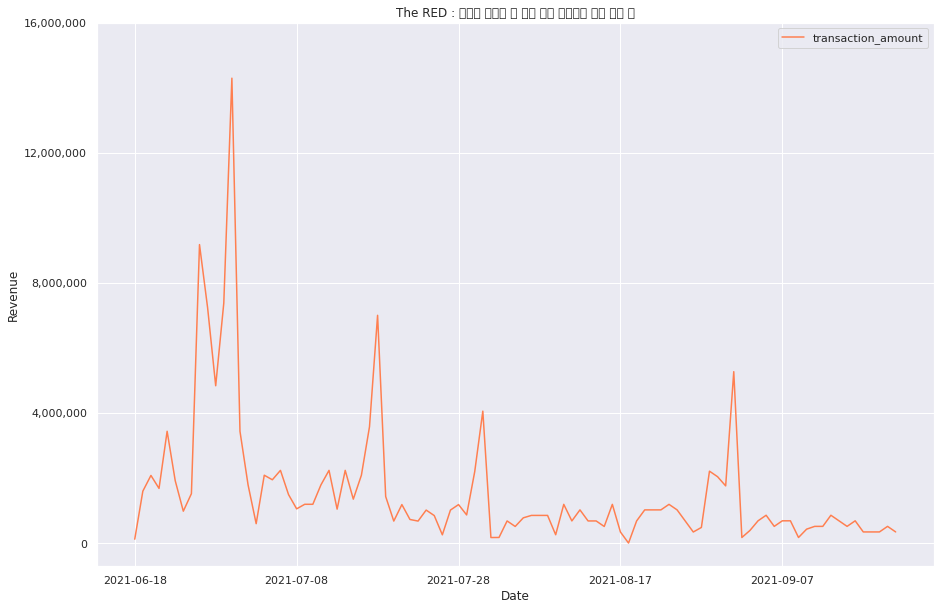

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figu

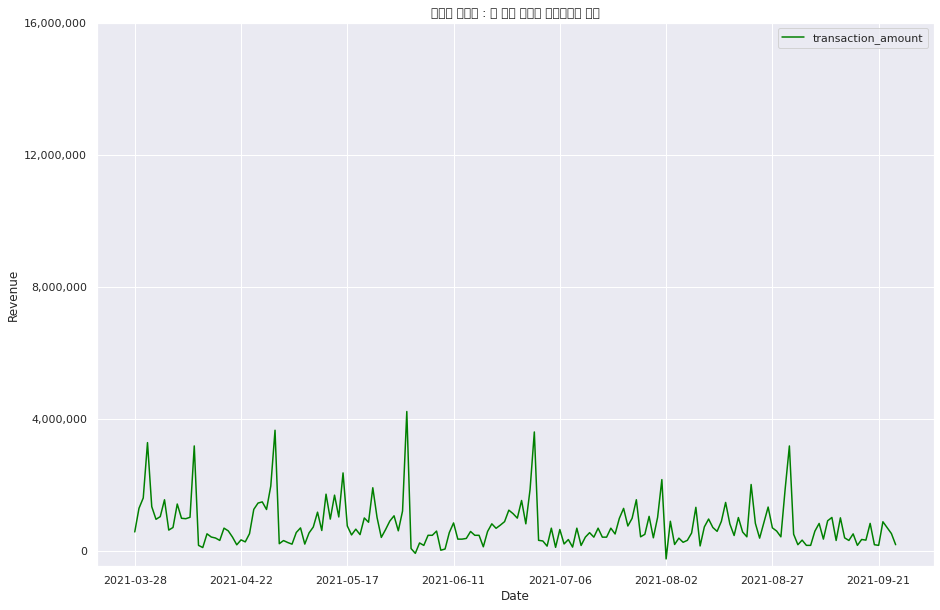

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figur

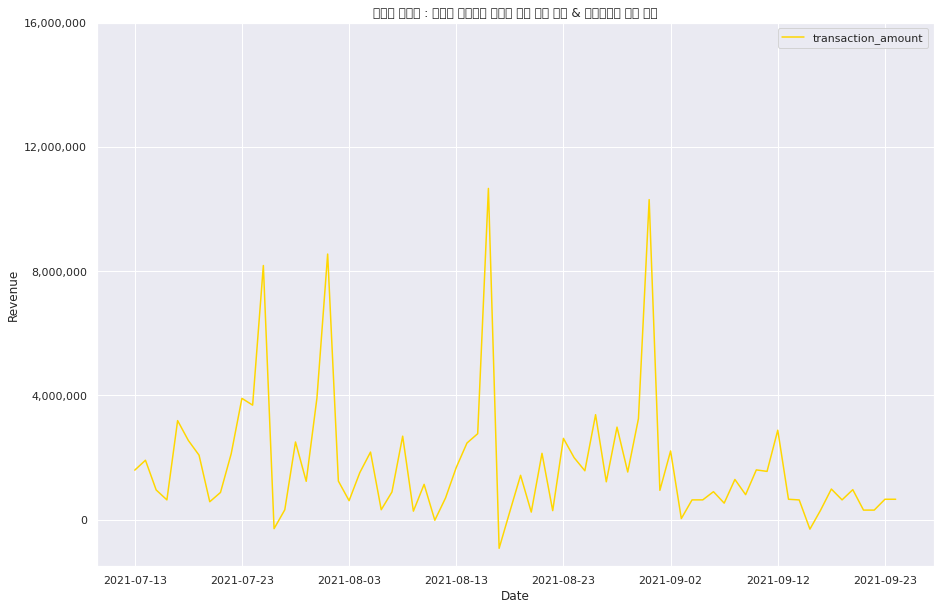

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figu

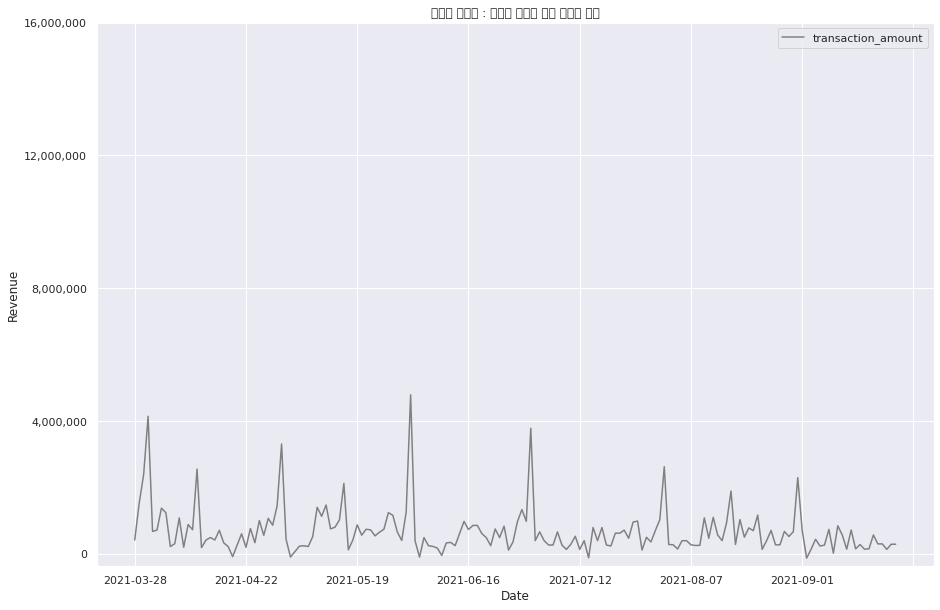

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figu

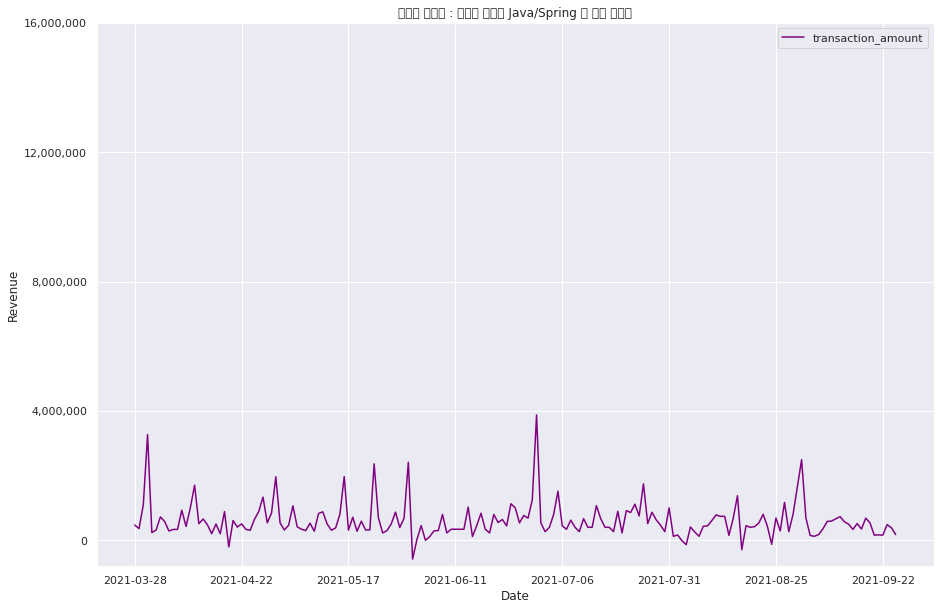

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45208 (\N{HANGUL SYLLABLE NA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52860 (\N{HANGUL SYLLABLE KAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from current font.
  fig.canvas.print_figure

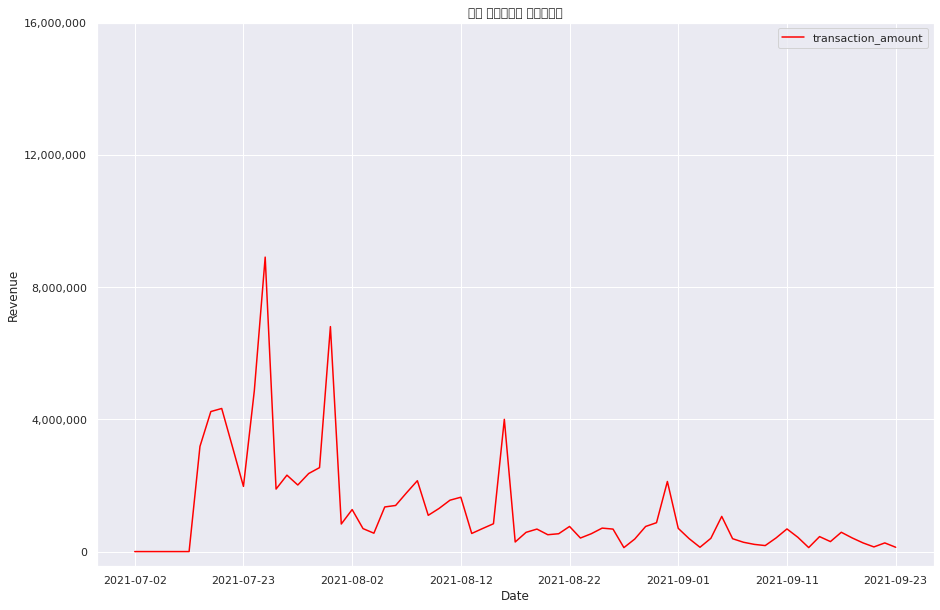

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figu

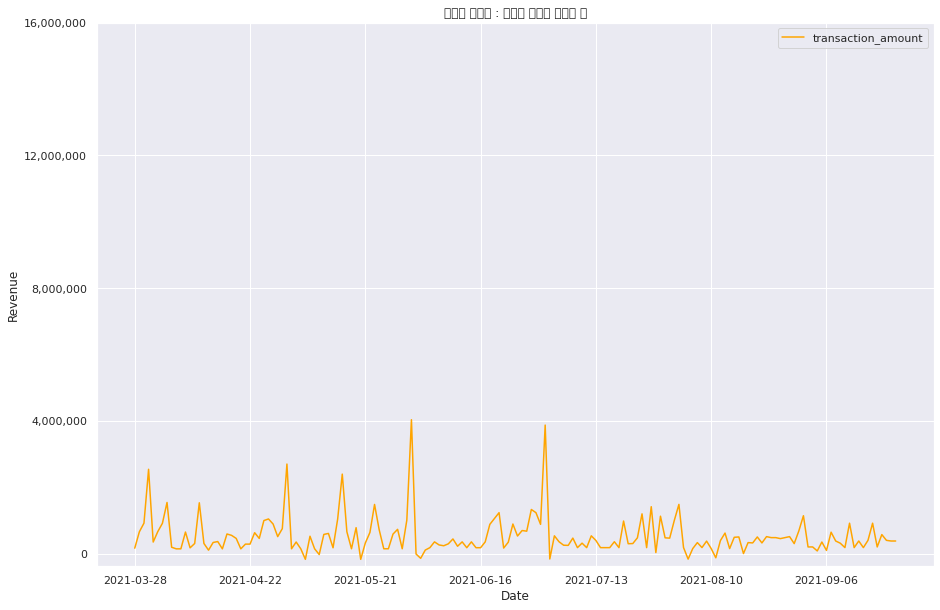

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figur

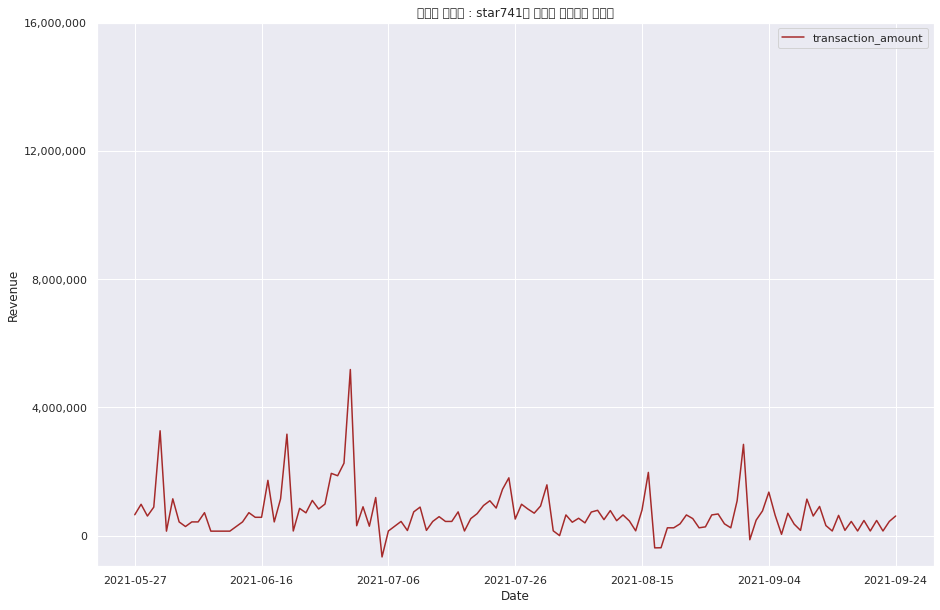

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50732 (\N{HANGUL SYLLABLE OL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figur

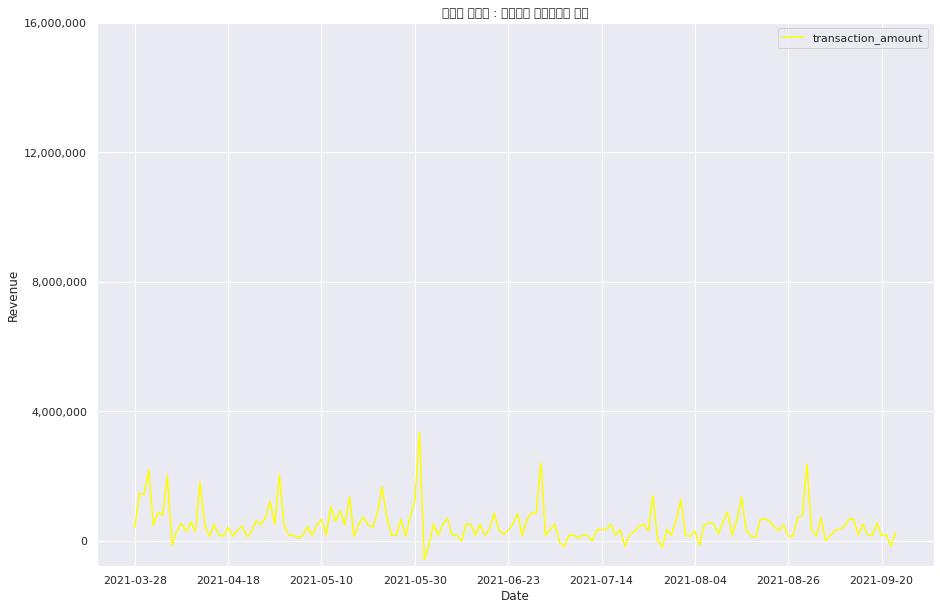

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52488 (\N{HANGUL SYLLABLE CO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54056 (\N{HANGUL SYLLABLE PAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53412 (\N{HANGUL SYLLABLE KI}) missing from current font.
  fig.canvas.print_figu

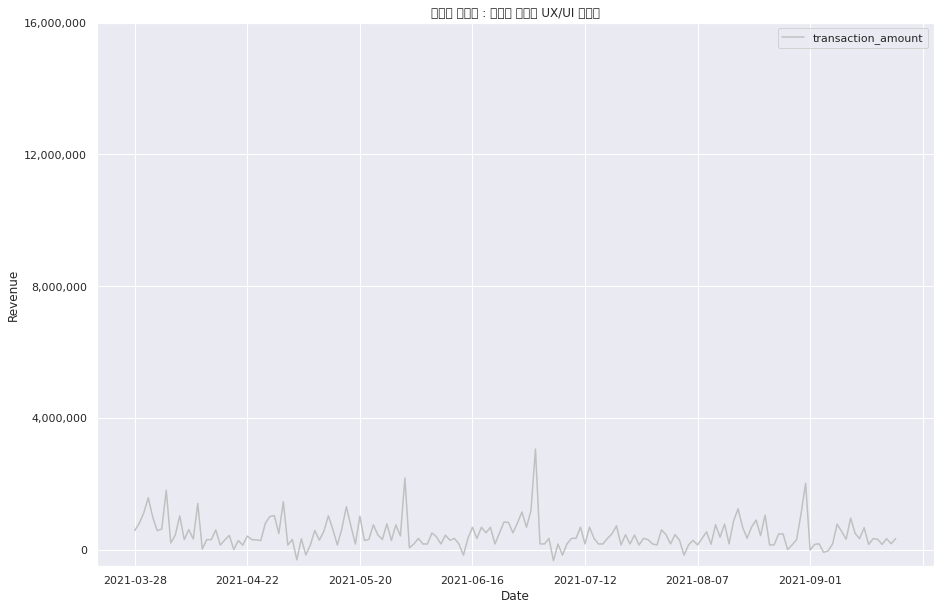

In [71]:
top_titles = []
for i in course_prc_sales_rf.index[0:10]:
    top_titles.append(i)
top_titles
sns.set_theme(style="darkgrid")
colors = ['coral','green','gold','gray','purple','red','orange','brown','yellow','silver']
count = 0
for title in top_titles:
#    for color in colors:
    i = prc[prc.course_title == title].groupby('completed_ymd')['transaction_amount'].sum()
    course_prc = pd.DataFrame(i)
    mpl.rcParams['font.family'] = 'Malgun Gothic'  # window용
    mpl.rcParams['font.size'] = 14  # 글자 크기
    mpl.rcParams['axes.unicode_minus'] = False  # 한글 폰트 사용 시, 마이너스 글자가 깨지는 현상을 해결
    course_title = title
    plt.rcParams["figure.figsize"] = (15,10)
#
    course_prc.plot(color=colors[count], title=title)
    count += 1
    plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
                   [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.show()

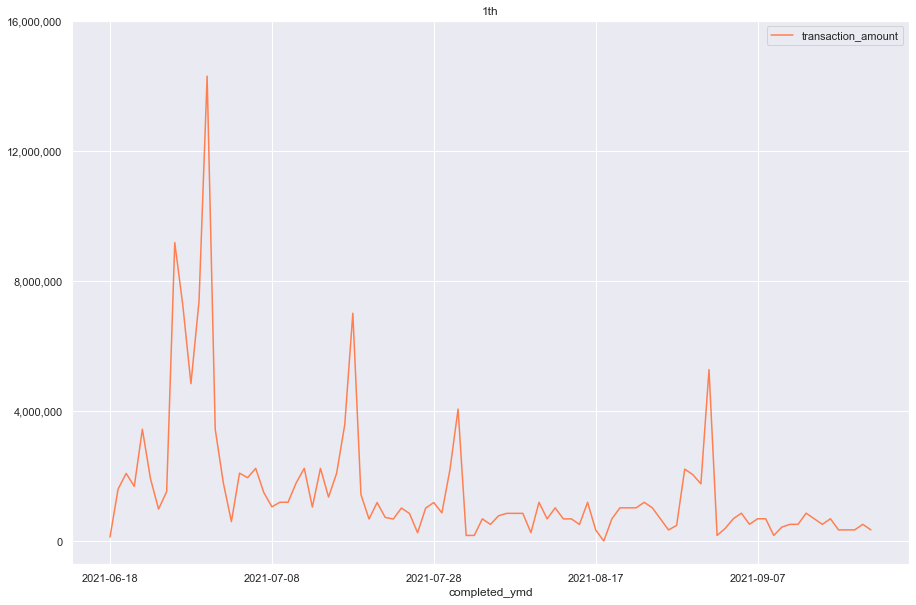

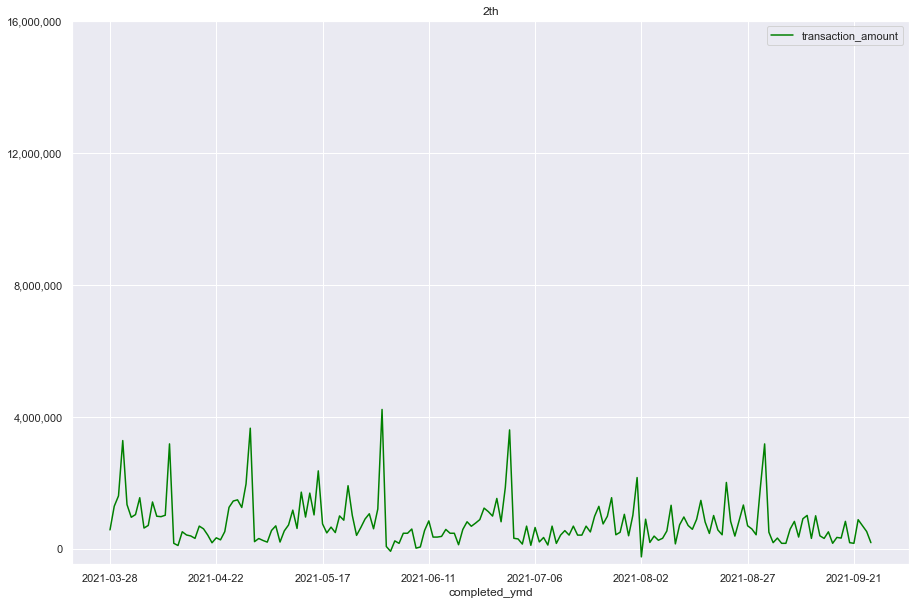

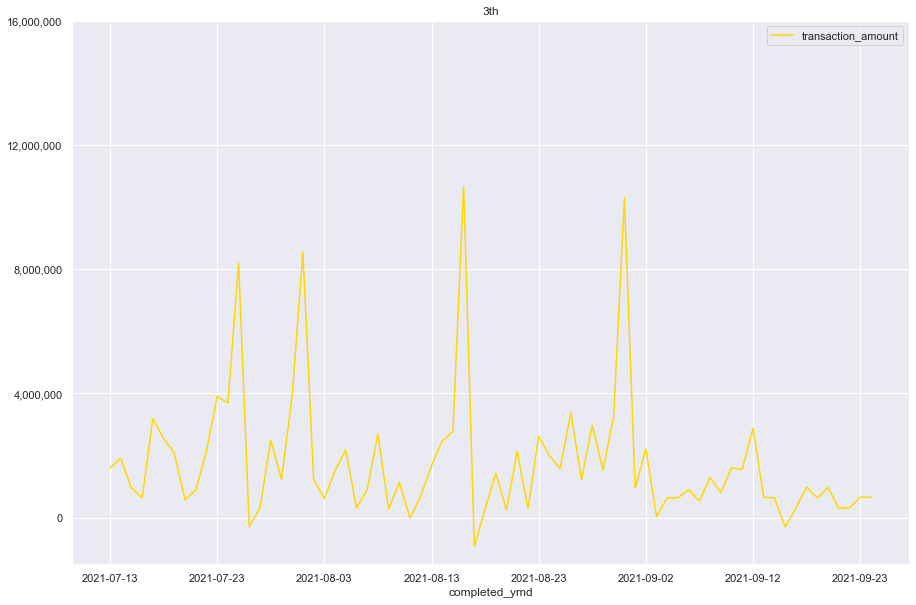

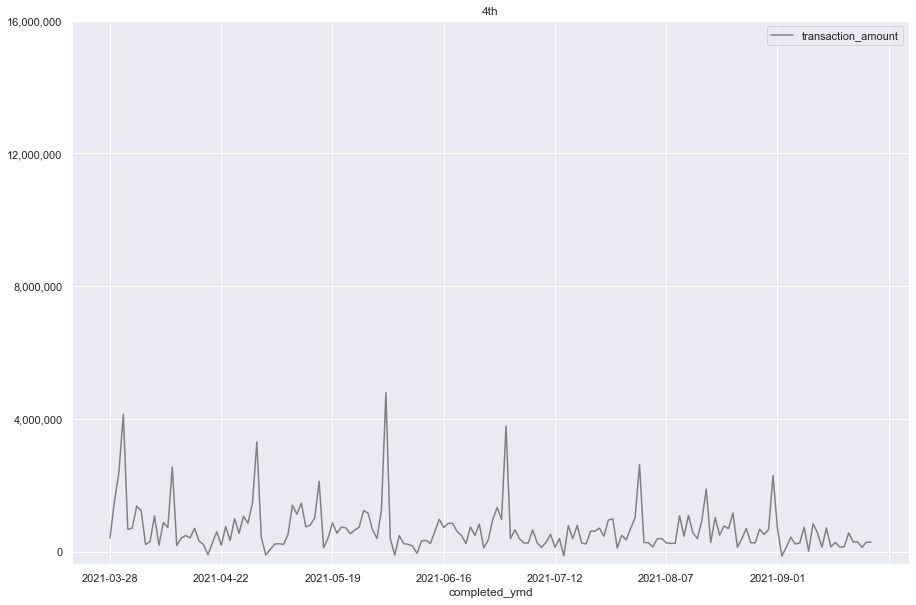

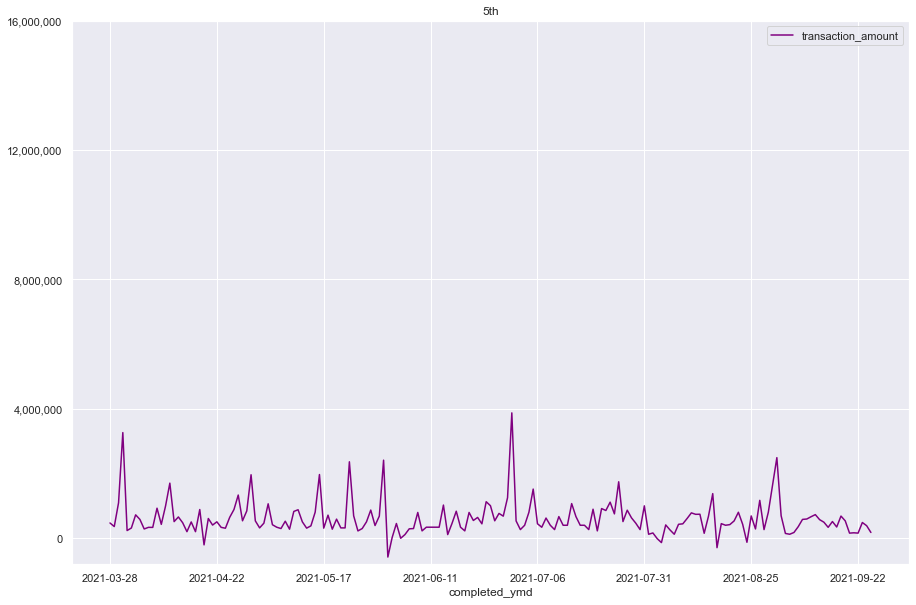

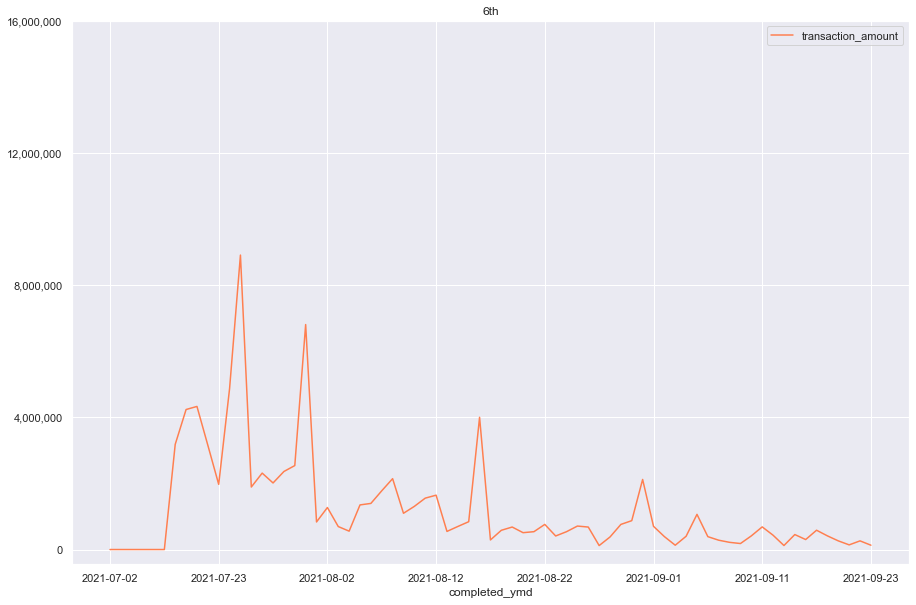

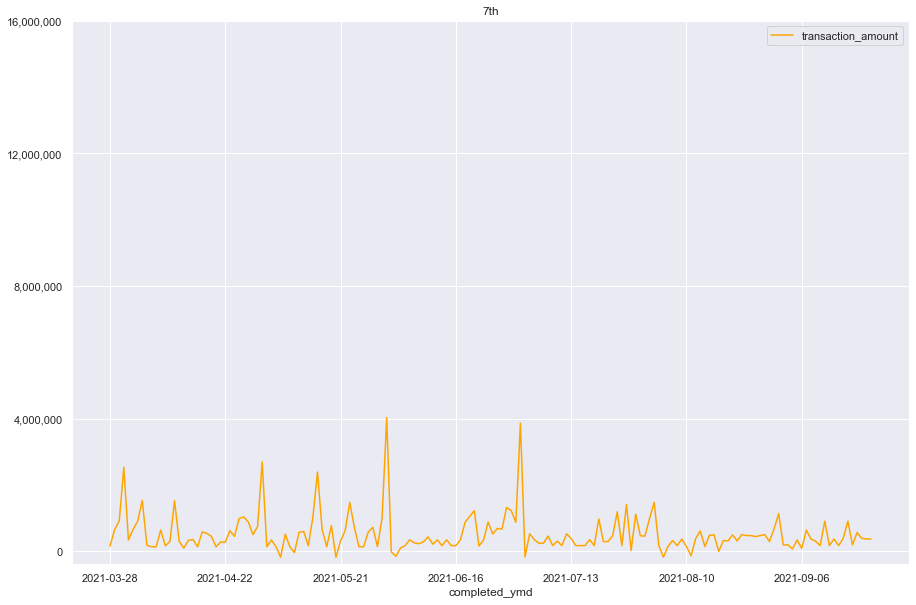

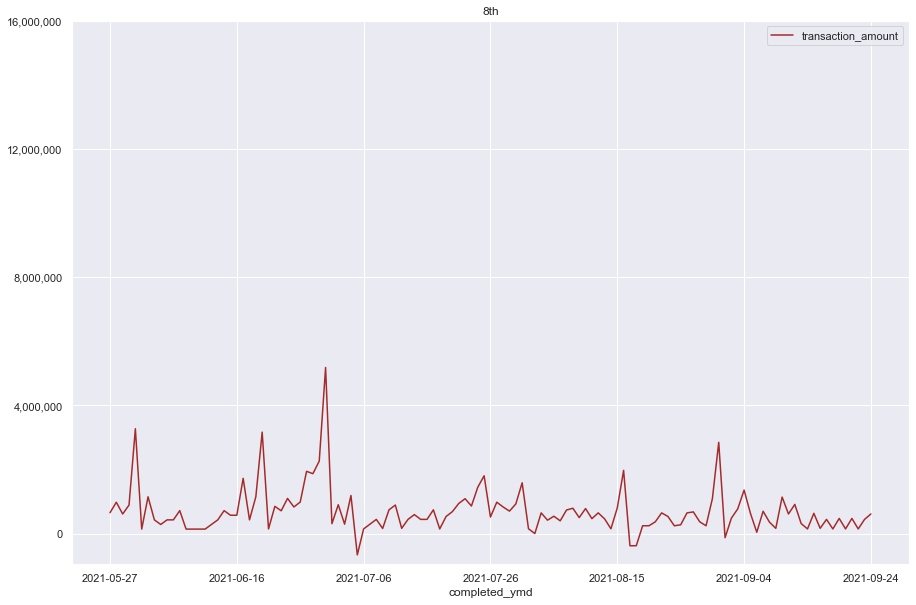

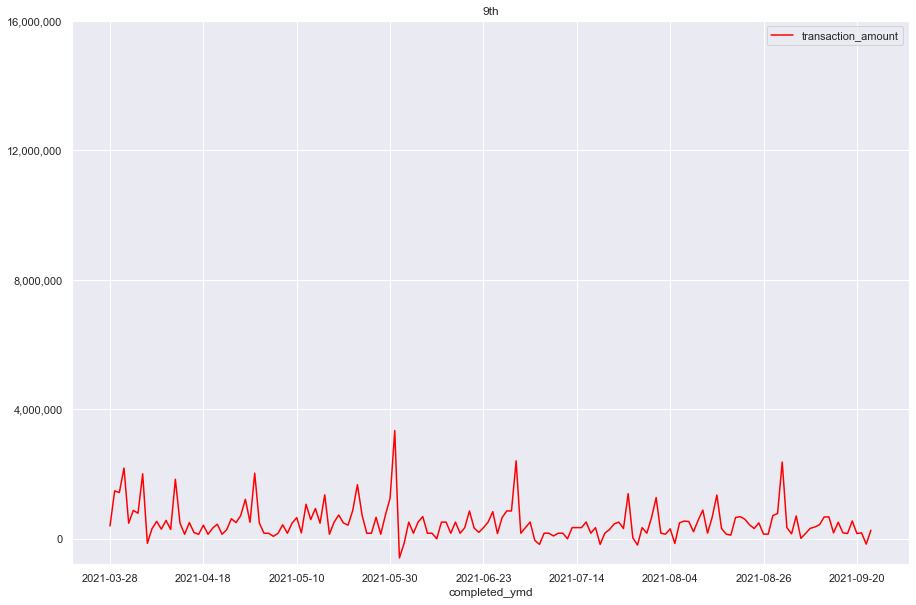

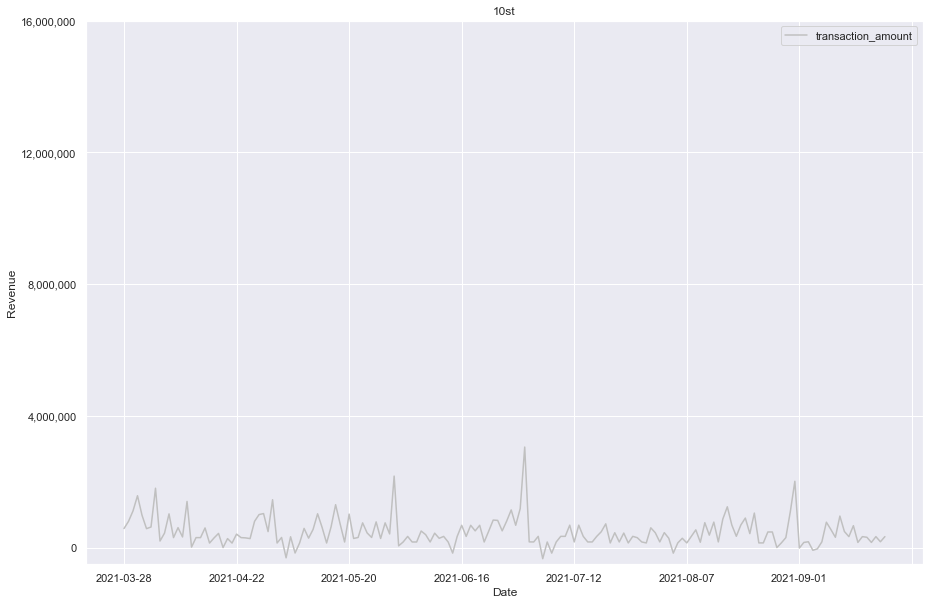

In [72]:
# The RED : 김영하 작가의 내 안의 숨은 이야기를 찾아 쓰는 법',
# 초격차 패키지 : 한 번에 끝내는 프론트엔드 개발',
# 올인원 패키지 : 박세익 전무에게 배우는 주식 시장 분석 & 포트폴리오 운용 전략',
# 초격차 패키지 : 한번에 끝내는 영상 촬영과 편집',
# 초격차 패키지 : 한번에 끝내는 Java/Spring 웹 개발 마스터',
# 나의 칼퇴치트키 엑셀유치원',
# 초격차 패키지 : 한번에 끝내는 디자인 툴',
# 올인원 패키지 : star741의 캐주얼 일러스트 드로잉',
# 올인원 패키지 : 완전정복 시각디자인 기초',
# 초격차 패키지 : 한번에 끝내는 UX/UI 디자인'
plt.rcParams["figure.figsize"] = (15,10)
sns.set_theme(style="darkgrid")
course_1th.plot(color='coral', title='1th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_2th.plot(color='green', title='2th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_3th.plot(color='gold', title='3th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_4th.plot(color='gray', title='4th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_5th.plot(color='purple', title='5th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_6th.plot(color='coral', title='6th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_7th.plot(color='orange', title='7th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_8th.plot(color='brown', title='8th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_9th.plot(color='red', title='9th')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
course_10th.plot(color='silver', title='10st')
plt.yticks([0, 4000000, 8000000, 12000000 ,16000000],
           [0, '4,000,000', '8,000,000', '12,000,000' ,'16,000,000'])
plt.legend()
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()

In [73]:
len(df['course_title'].unique())

608

## 전체 카테고리 수

In [74]:
prc.category_title.value_counts()

프로그래밍      17020
데이터사이언스     7126
업무 생산성      6890
디자인         6076
영상/3D       5451
마케팅         4993
부동산/금융      2913
투자/재테크      1569
크리에이티브       934
비즈니스          23
지식콘텐츠         22
파이낸스          18
Name: category_title, dtype: int64

In [75]:
prc_categorys = prc.groupby('category_title')['transaction_amount'].sum()
prc_categorys = pd.DataFrame(prc_categorys.sort_values(ascending=False))
total_tr = prc_categorys.transaction_amount.sum()
prc_categorys['share_rate'] = round((prc_categorys.transaction_amount/total_tr * 100), 2)
prc_categorys

,transaction_amount,share_rate
category_title,,
프로그래밍,1650488541,27.63
데이터사이언스,950073852,15.91
디자인,663196168,11.10
마케팅,587613324,9.84
업무 생산성,572358665,9.58
영상/3D,544706205,9.12
부동산/금융,471074334,7.89
투자/재테크,277706420,4.65
크리에이티브,240873160,4.03


### 카테고리별 매출

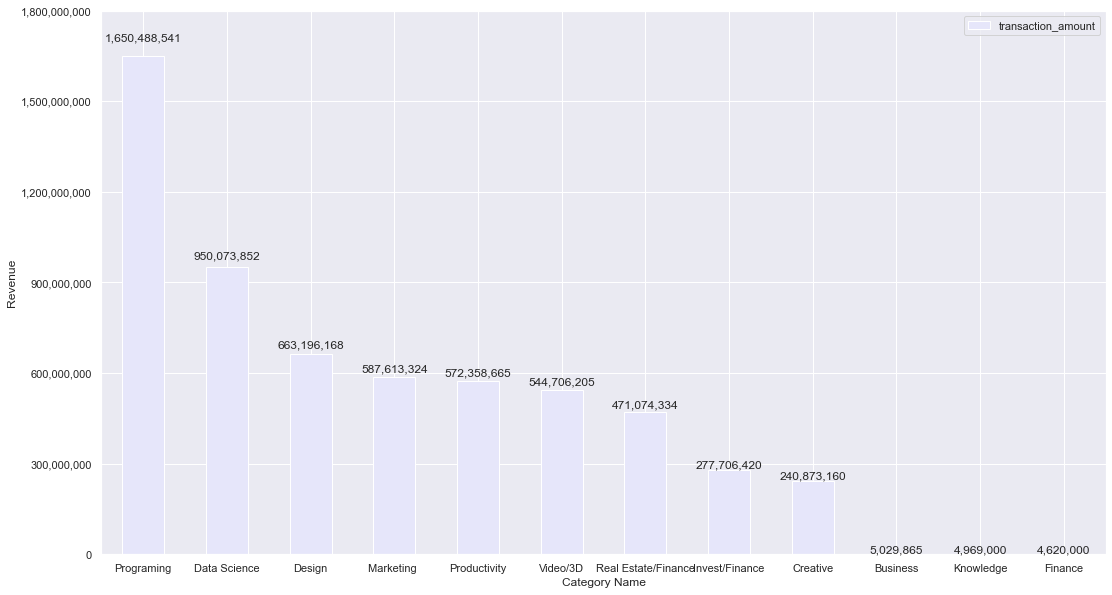

In [76]:
# 시각화

sns.set_theme(style="darkgrid")
my_colors = ['#90EE90', '#90EE90', '#8FBC8F','#3CB371', '#2E8B57', '#6B8E23']

prc_m_g = prc_categorys.plot.bar(y='transaction_amount',
                         rot=0,
                         color='lavender',
                         figsize=(18,10))

plt.xlabel('Category Name')
plt.ylabel('Revenue')
plt.yticks([ 0, 300000000, 600000000, 900000000, 1200000000 ,1500000000 ,1800000000], 
           [ 0, '300,000,000', '600,000,000', '900,000,000', '1,200,000,000' ,'1,500,000,000' ,'1,800,000,000'])
# plt.xlim(0.5,5.5)
plt.xticks([1, 2, 3 ,4 ,5 ,6,7,8,9,10,11,0], 
            ['Data Science', 'Design', 'Marketing ', 'Productivity', 'Video/3D', 'Real Estate/Finance','Invest/Finance','Creative', 'Business' ,'Knowledge', 'Finance','Programing'])
#labels = ['Data Science', 'Design', 'Marketing ', 'Real Estate/Finance', 'Business ', 'Work Productivity', 'Video/3D','Knowledge','Creative ','Investment/Finance Technology', 'Finance','Programing']


for p in prc_m_g.patches:
    left, bottom, width, height = p.get_bbox().bounds
    prc_m_g.annotate(format(int(height), ','), (left+width/2, height*1.03), ha='center')


plt.show()

> IT관련 강의가 패캠의 매출 상당부분 차지

### 카테고리별 매출 비중

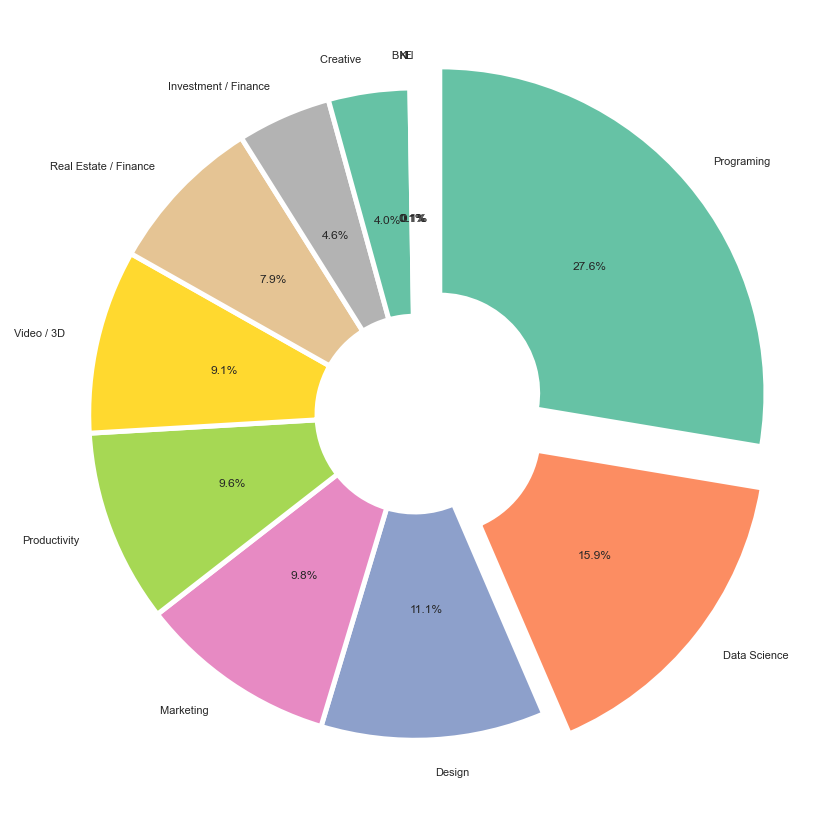

In [77]:
prc_categorys_df = pd.DataFrame(prc_categorys)
labels = ['Programing', 'Data Science', 'Design', 'Marketing ', 'Productivity', 'Video / 3D', 'Real Estate / Finance','Investment / Finance','Creative ', 'BN ','KL', 'FI']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.10, 0.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
colors = sns.color_palette("Set2")


plt.figure(figsize=(15,15))
plt.pie(prc_categorys_df.transaction_amount,
        labels = labels,
        autopct= '%0.1f%%',
        counterclock=False,
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       )
plt.show()

### 카테고리별 판매 추의 그래프

In [78]:
category_1th = prc[prc.category_title == '프로그래밍']
category_1th = pd.DataFrame(category_1th.groupby('completed_ymd')['transaction_amount'].sum())
category_2th = prc[prc.category_title == '데이터사이언스']
category_2th = pd.DataFrame(category_2th.groupby('completed_ymd')['transaction_amount'].sum())
category_3th = prc[prc.category_title == '디자인']
category_3th = pd.DataFrame(category_3th.groupby('completed_ymd')['transaction_amount'].sum())
category_4th = prc[prc.category_title == '마케팅']
category_4th = pd.DataFrame(category_4th.groupby('completed_ymd')['transaction_amount'].sum())
category_5th = prc[prc.category_title == '업무 생산성']
category_5th = pd.DataFrame(category_5th.groupby('completed_ymd')['transaction_amount'].sum())
category_6th = prc[prc.category_title == '영상/3D']
category_6th = pd.DataFrame(category_6th.groupby('completed_ymd')['transaction_amount'].sum())
category_7th = prc[prc.category_title == '부동산/금융']
category_7th = pd.DataFrame(category_7th.groupby('completed_ymd')['transaction_amount'].sum())
category_8th = prc[prc.category_title == '투자/재테크']
category_8th = pd.DataFrame(category_8th.groupby('completed_ymd')['transaction_amount'].sum())
category_9th = prc[prc.category_title == '크리에이티브']
category_9th = pd.DataFrame(category_9th.groupby('completed_ymd')['transaction_amount'].sum())
category_10th = prc[prc.category_title == '비즈니스']
category_10th = pd.DataFrame(category_10th.groupby('completed_ymd')['transaction_amount'].sum())

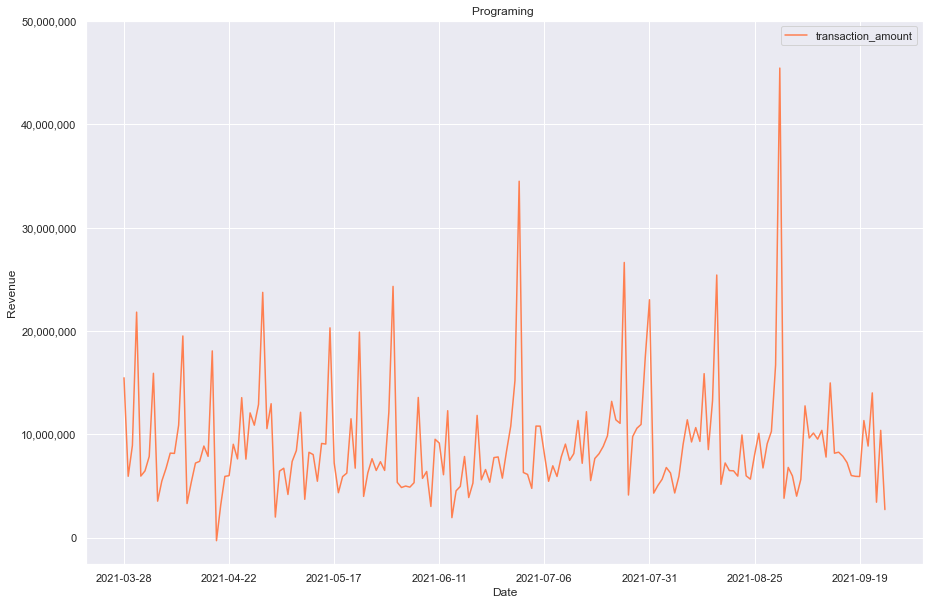

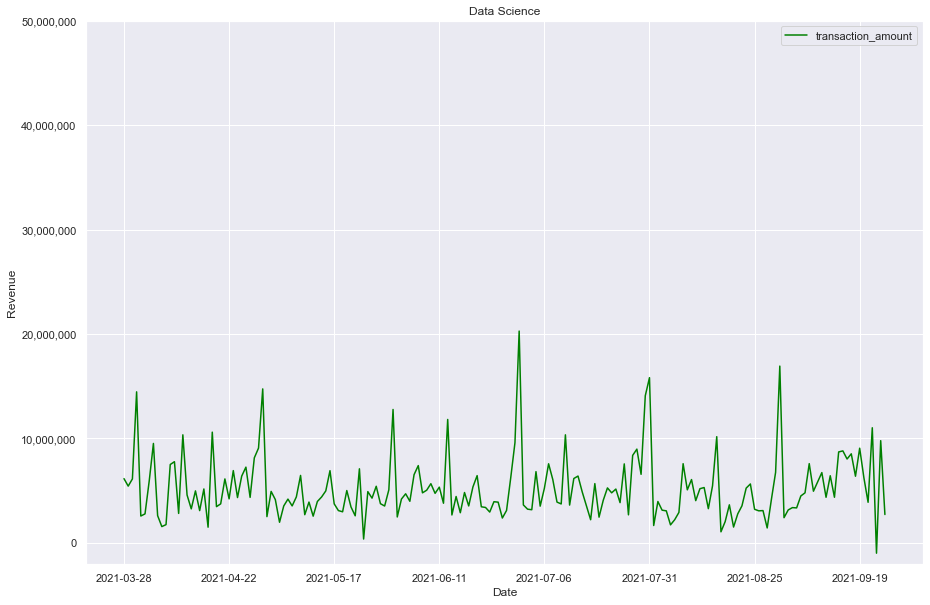

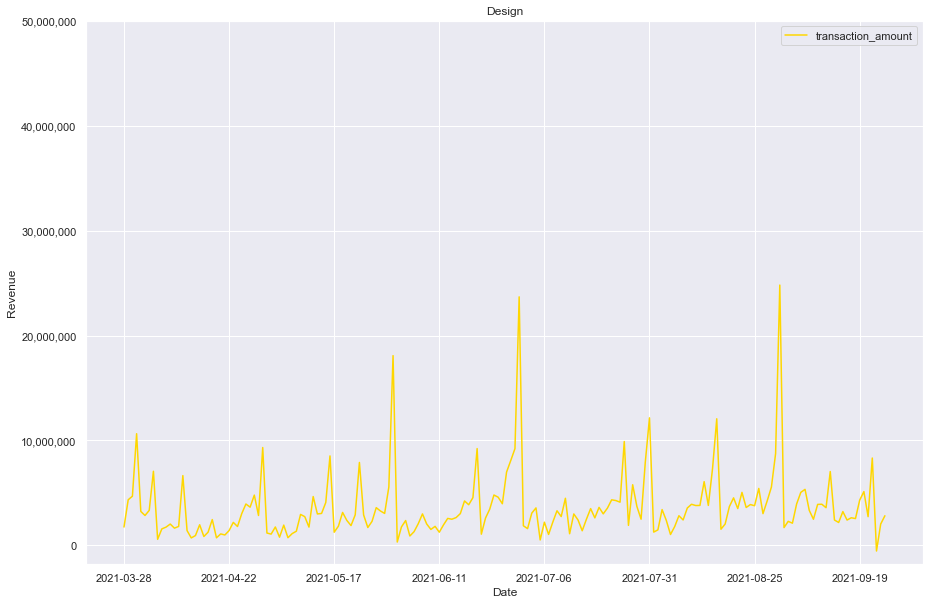

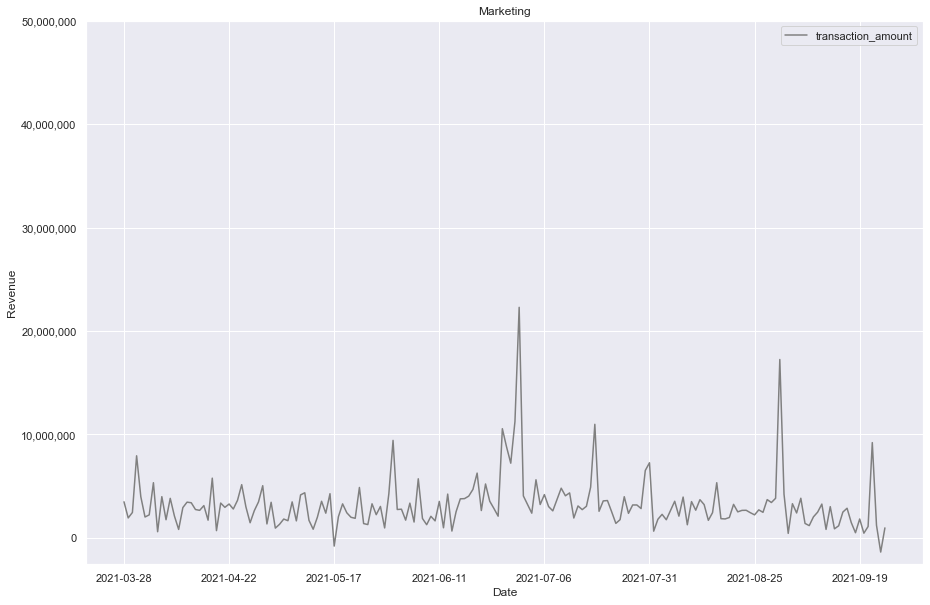

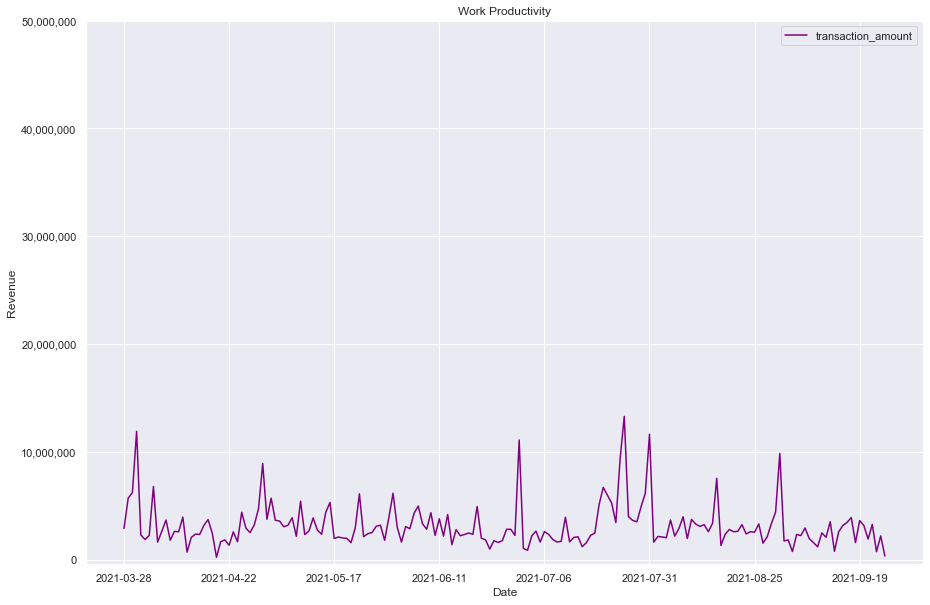

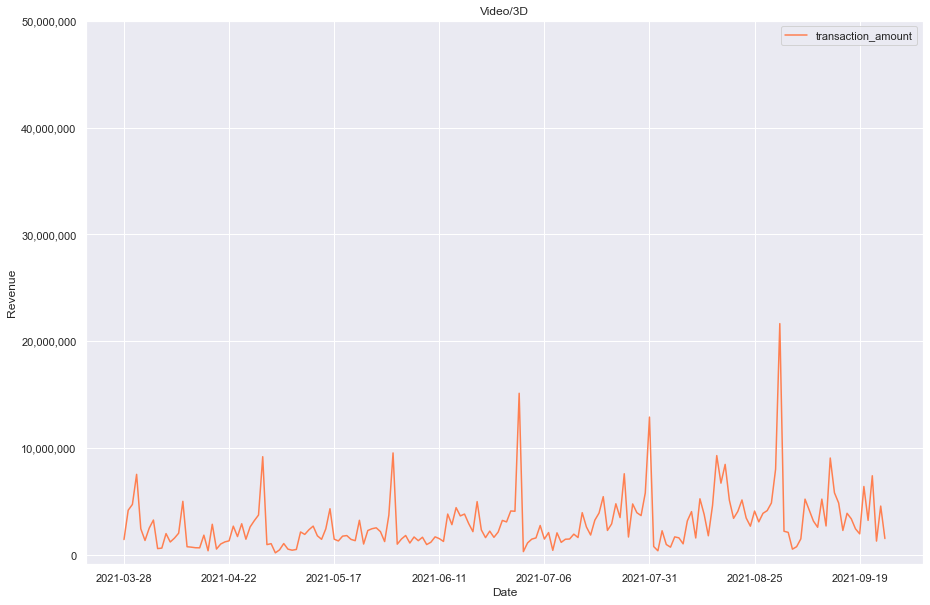

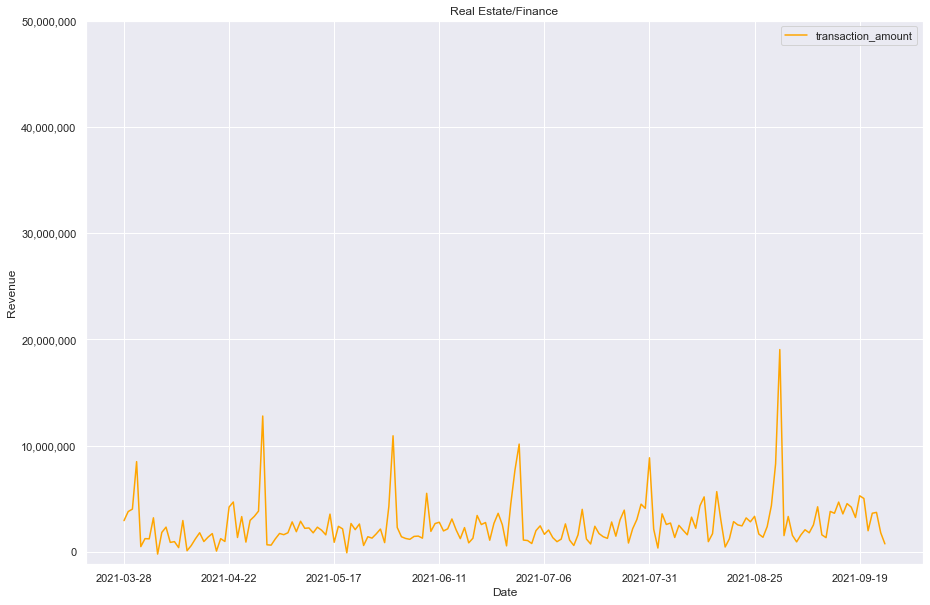

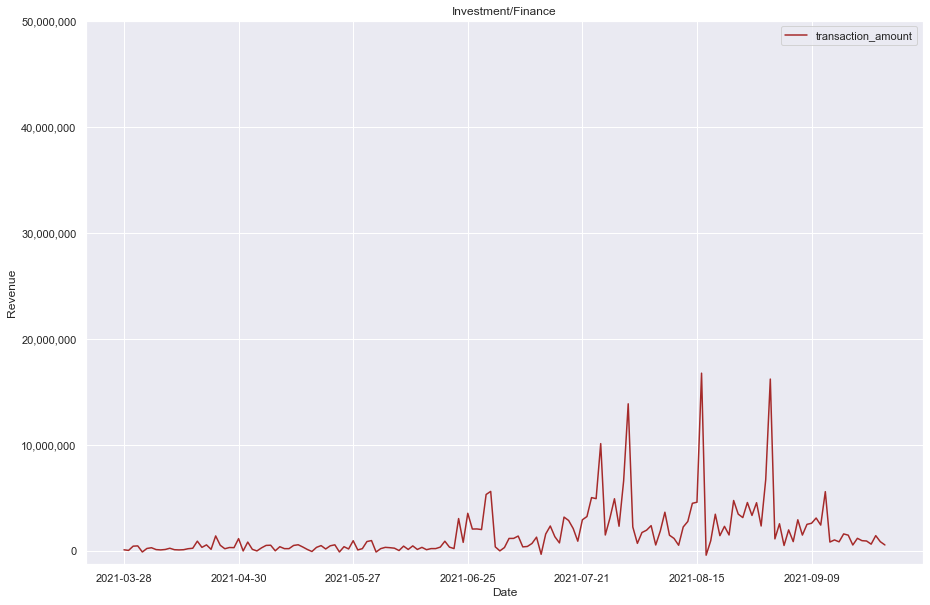

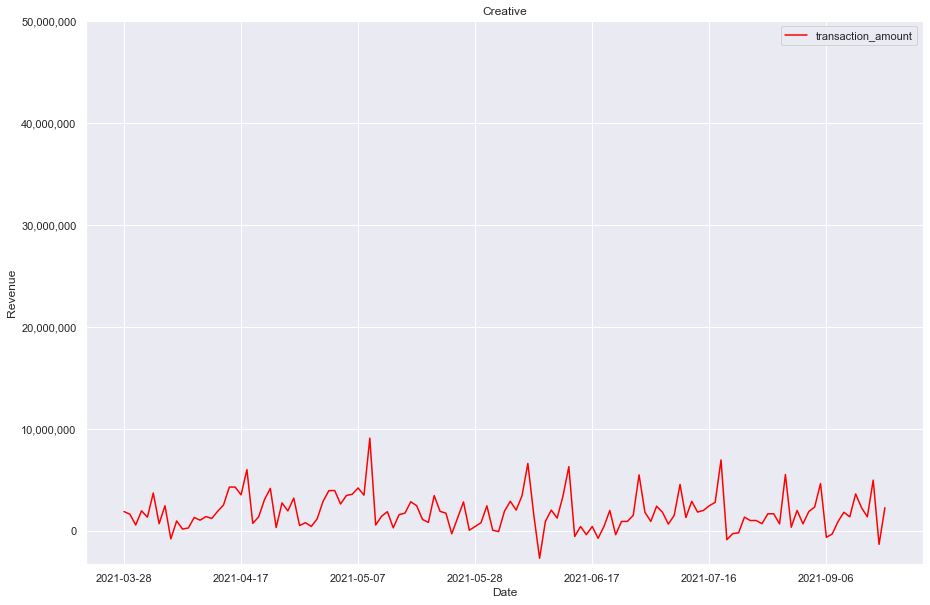

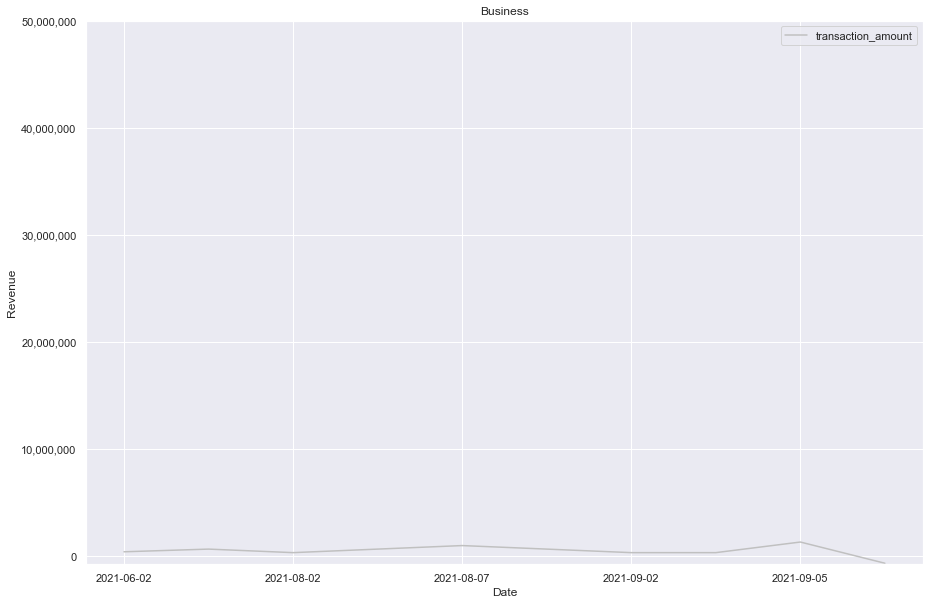

In [79]:
# 시각화
plt.rcParams["figure.figsize"] = (15,10)
sns.set_theme(style="darkgrid")
category_1th.plot(color='coral', title='Programing ')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_2th.plot(color='green', title='Data Science')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_3th.plot(color='gold', title='Design')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_4th.plot(color='gray', title='Marketing')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_5th.plot(color='purple', title='Work Productivity')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_6th.plot(color='coral', title='Video/3D')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_7th.plot(color='orange', title='Real Estate/Finance')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_8th.plot(color='brown', title='Investment/Finance')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_9th.plot(color='red', title='Creative')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
category_10th.plot(color='silver', title='Business')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 10000000, 20000000, 30000000, 40000000 ,50000000],
           [0, '10,000,000', '20,000,000', '30,000,000', '40,000,000' ,'50,000,000'])
plt.show()
# 프로그래밍      1650488541
# 데이터사이언스     950073852
# 디자인         663196168
# 마케팅         587613324
# 업무 생산성      572358665
# 영상/3D       544706205
# 부동산/금융      471074334
# 투자/재테크      277706420
# 크리에이티브      240873160
# 비즈니스          5029865

### 구매률과 환불률의 상관관계

# PG사 목록

In [80]:
pf_share = pd.DataFrame(prc.pg.value_counts())

## 기존 PG사 vs 신규 PG사 점유율 현황

In [81]:
total_tr = pf_share.pg.sum()
pf_share['share_rate'] = round((pf_share.pg/total_tr * 100), 2)
pf_share

,pg,share_rate
INICIS,28443,53.63
KAKAO,9626,18.15
COMM,7580,14.29
NAVER,4776,9.01
PAYCO,2456,4.63
CHAI,154,0.29


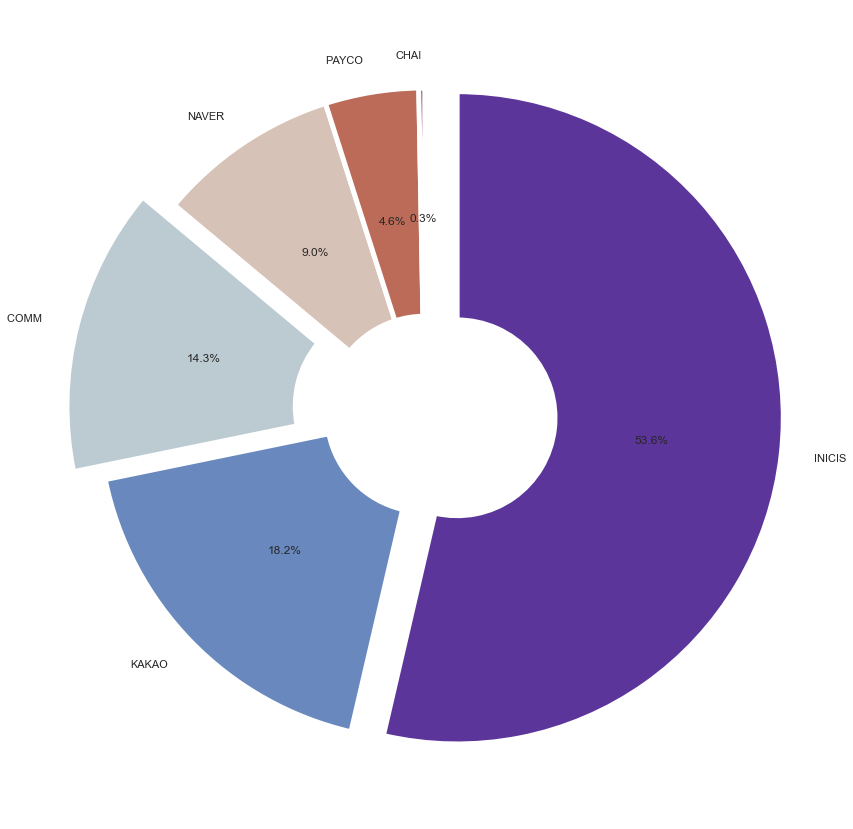

In [82]:
labels = ['INICIS', 'KAKAO', 'COMM ', 'NAVER', 'PAYCO ', 'CHAI']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.10, 0, 0.10, 0, 0, 0]
colors = sns.color_palette("twilight_shifted")


plt.figure(figsize=(15,15))
plt.pie(pf_share.pg,
        labels = labels,
        autopct='%0.1f%%',
        counterclock=False,
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       )
plt.show()

### 기존 PG사 vs 신규 PG사 기간별 점유율 변동 변화추이

In [83]:
['INICIS', 'KAKAO', 'COMM ', 'NAVER', 'PAYCO ', 'CHAI']
INICIS = prc[prc.pg == 'INICIS']
INICIS = pd.DataFrame(INICIS.groupby('completed_ymd')['transaction_amount'].sum())
COMM = prc[prc.pg == 'COMM']
COMM = pd.DataFrame(COMM.groupby('completed_ymd')['transaction_amount'].sum())
KAKAO = prc[prc.pg == 'KAKAO']
KAKAO = pd.DataFrame(KAKAO.groupby('completed_ymd')['transaction_amount'].sum())
NAVER = prc[prc.pg == 'NAVER']
NAVER = pd.DataFrame(NAVER.groupby('completed_ymd')['transaction_amount'].sum())
PAYCO = prc[prc.pg == 'PAYCO']
PAYCO = pd.DataFrame(PAYCO.groupby('completed_ymd')['transaction_amount'].sum())
CHAI = prc[prc.pg == 'CHAI']
CHAI = pd.DataFrame(CHAI.groupby('completed_ymd')['transaction_amount'].sum())


In [84]:
INICIS.max()

transaction_amount    99660183
dtype: int64

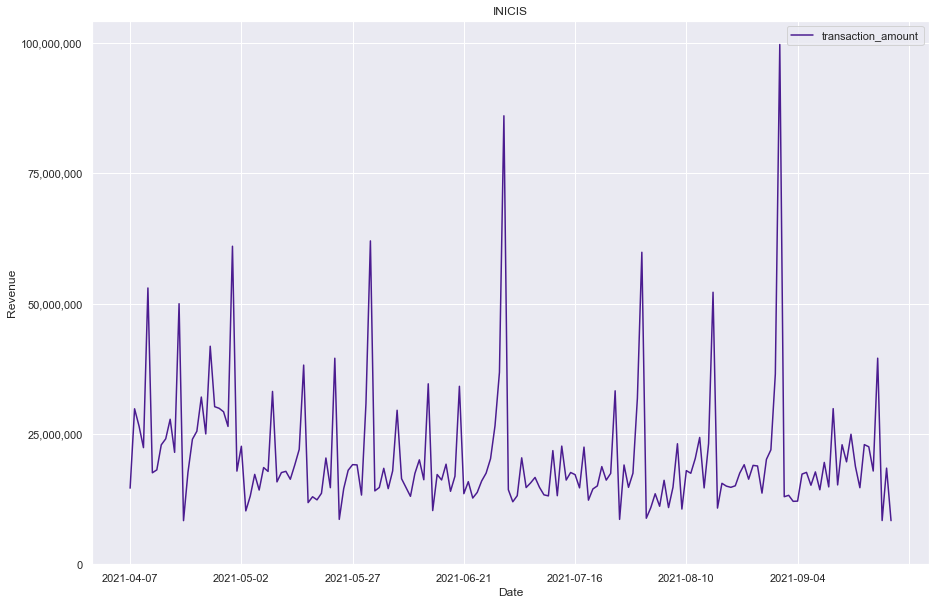

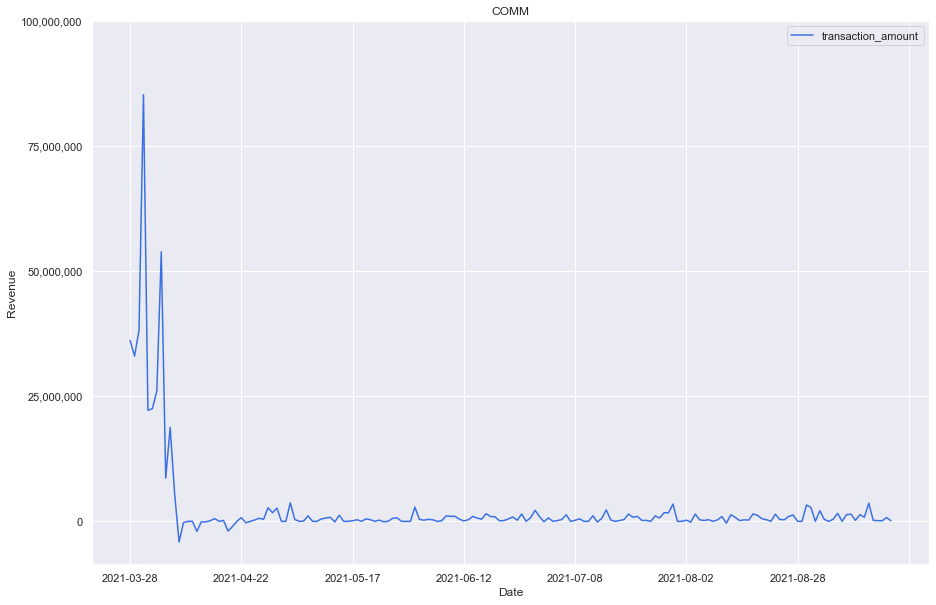

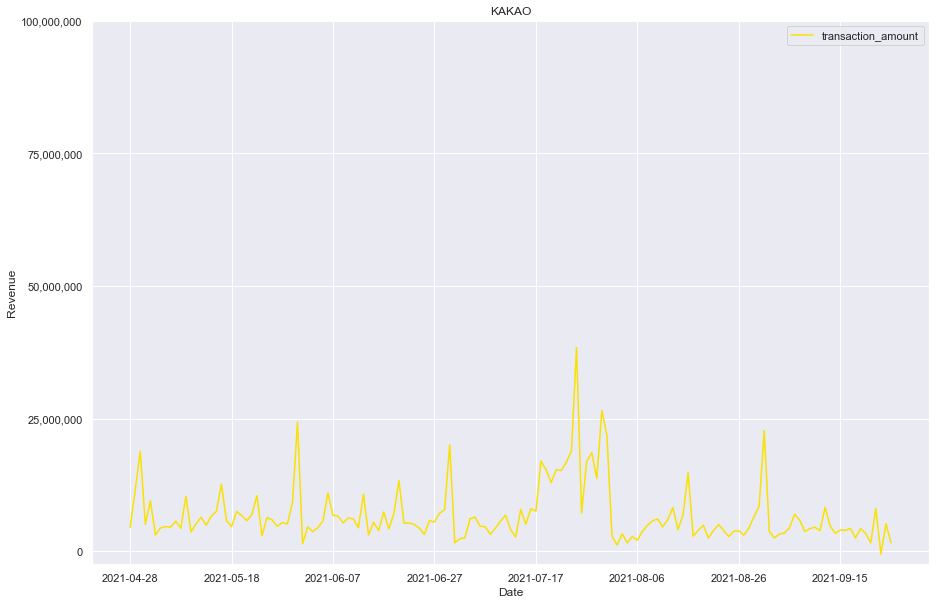

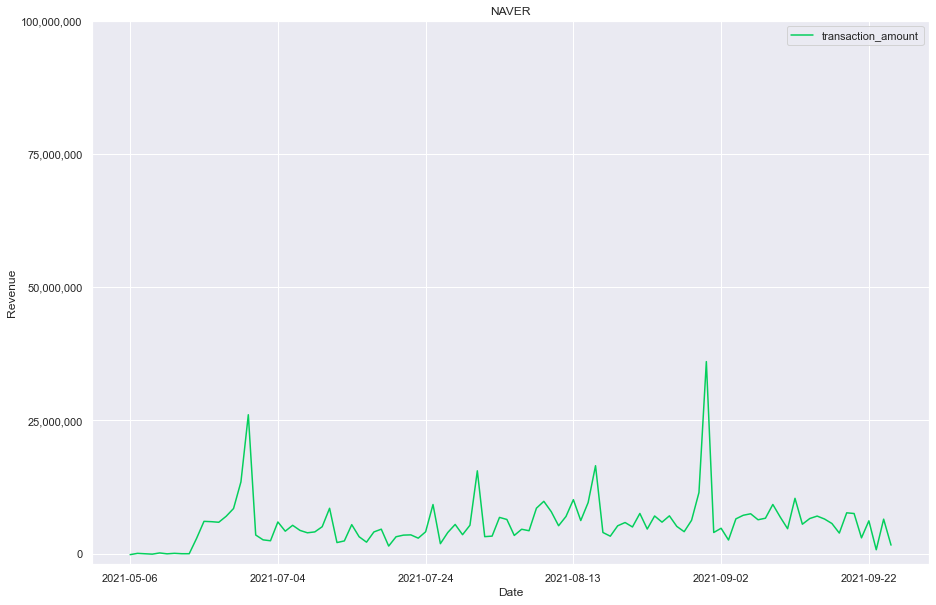

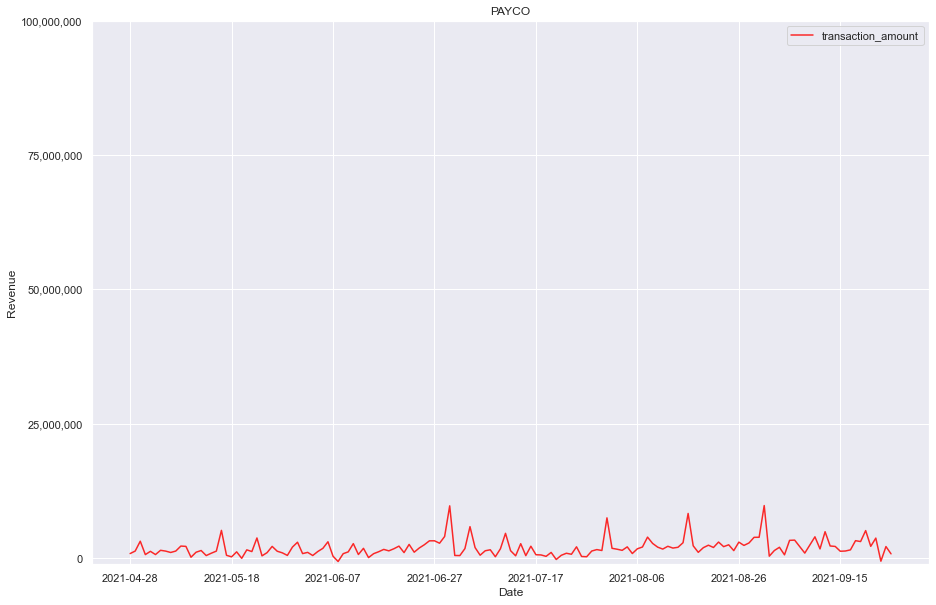

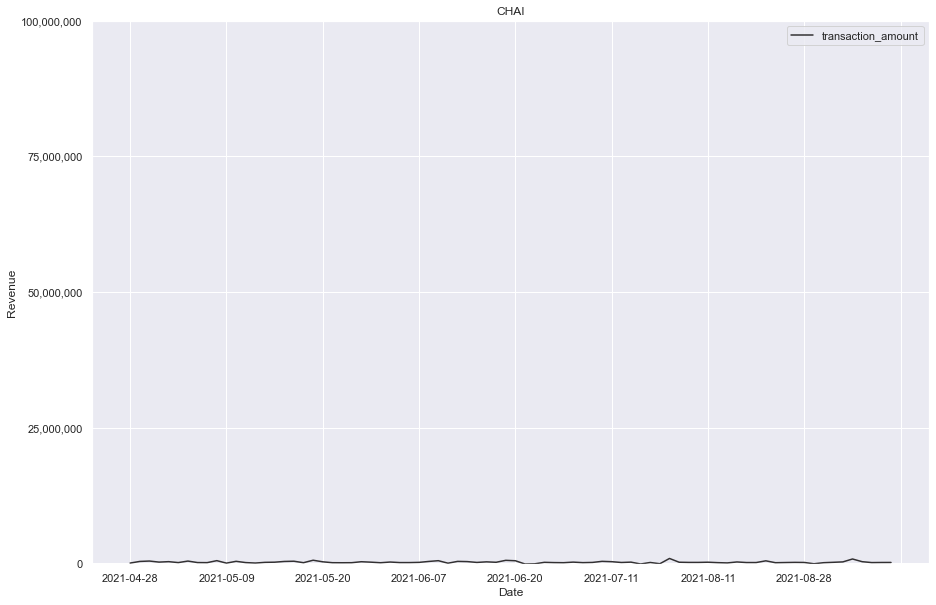

In [85]:
plt.rcParams["figure.figsize"] = (15,10)
sns.set_theme(style="darkgrid")

INICIS.plot(color='#4B1C90', title='INICIS')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 25000000, 50000000, 75000000 ,100000000], 
           [0, '25,000,000', '50,000,000', '75,000,000' ,'100,000,000'])

COMM.plot(color='#3B70E3', title='COMM')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 25000000, 50000000, 75000000 ,100000000], 
           [0, '25,000,000', '50,000,000', '75,000,000' ,'100,000,000'])

KAKAO.plot(color='#FAE100', title='KAKAO')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 25000000, 50000000, 75000000 ,100000000], 
           [0, '25,000,000', '50,000,000', '75,000,000' ,'100,000,000'])

NAVER.plot(color='#04CF5C', title='NAVER')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 25000000, 50000000, 75000000 ,100000000], 
           [0, '25,000,000', '50,000,000', '75,000,000' ,'100,000,000'])

PAYCO.plot(color='#FA2828', title='PAYCO')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 25000000, 50000000, 75000000 ,100000000], 
           [0, '25,000,000', '50,000,000', '75,000,000' ,'100,000,000'])

CHAI.plot(color='#323032', title='CHAI')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 25000000, 50000000, 75000000 ,100000000], 
           [0, '25,000,000', '50,000,000', '75,000,000' ,'100,000,000'])




plt.show()

In [86]:
# lambda 함수를 이용해 월단위로 데이터 뽑기
in_prc_by_month = prc[prc.pg == 'INICIS']
in_prc_by_month = in_prc_by_month.set_index('completed_at').groupby(lambda month: month.month).sum()[['transaction_amount']]
in_prc_by_month_df = pd.DataFrame(in_prc_by_month)


comm_prc_by_month = prc[prc.pg == 'COMM']
comm_prc_by_month = comm_prc_by_month.set_index('completed_at').groupby(lambda month: month.month).sum()[['transaction_amount']]
comm_prc_by_month_df = pd.DataFrame(comm_prc_by_month)


kakao_prc_by_month = prc[prc.pg == 'KAKAO']
kakao_prc_by_month = kakao_prc_by_month.set_index('completed_at').groupby(lambda month: month.month).sum()[['transaction_amount']]
kakao_prc_by_month_df = pd.DataFrame(kakao_prc_by_month)


naver_prc_by_month = prc[prc.pg == 'NAVER']
naver_prc_by_month = naver_prc_by_month.set_index('completed_at').groupby(lambda month: month.month).sum()[['transaction_amount']]
naver_prc_by_month_df = pd.DataFrame(naver_prc_by_month)


In [87]:
# 월별 매출 변수 정의
prc_by_month = prc.set_index('completed_at').groupby(lambda month: month.month).sum()[['transaction_amount']]
prc_by_month_df = pd.DataFrame(prc_by_month)

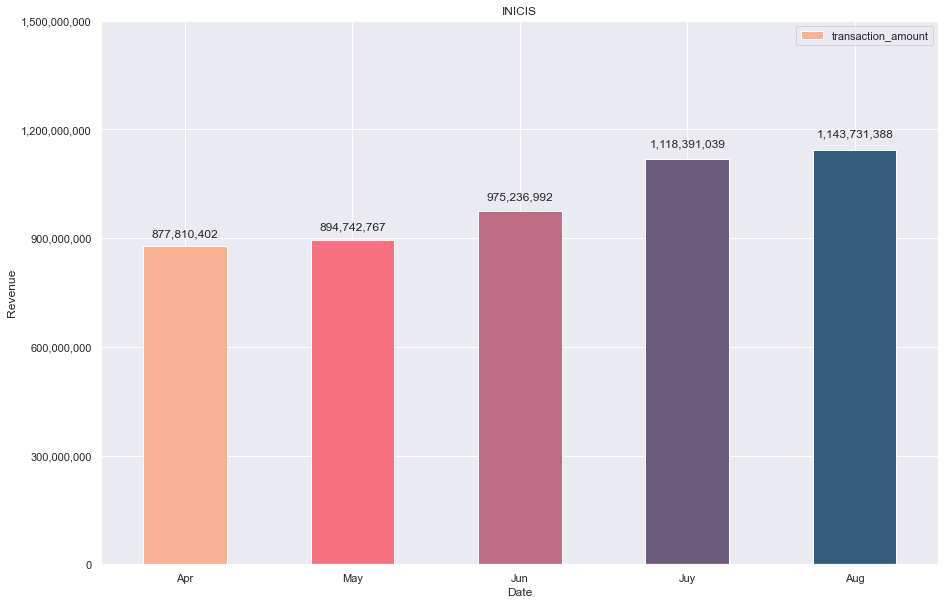

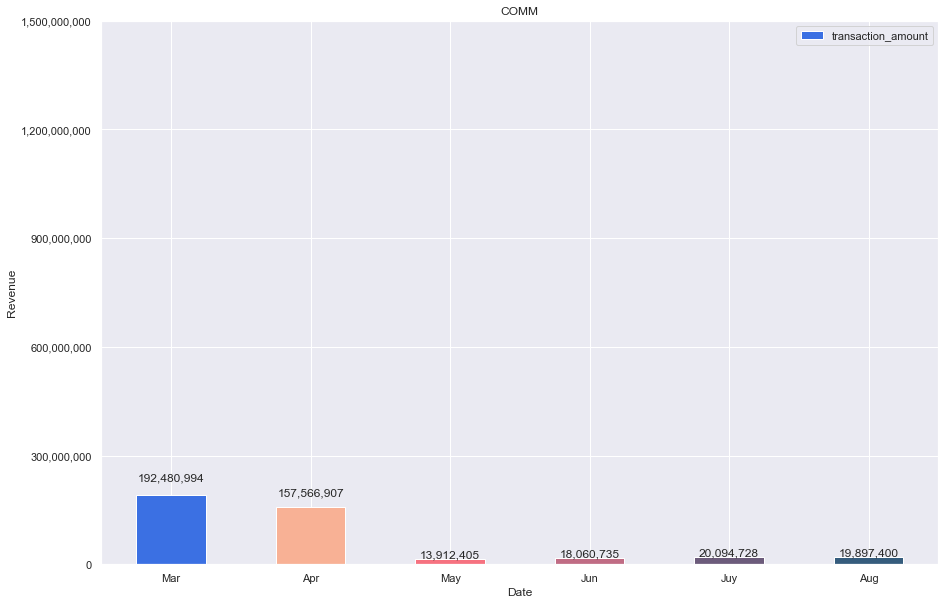

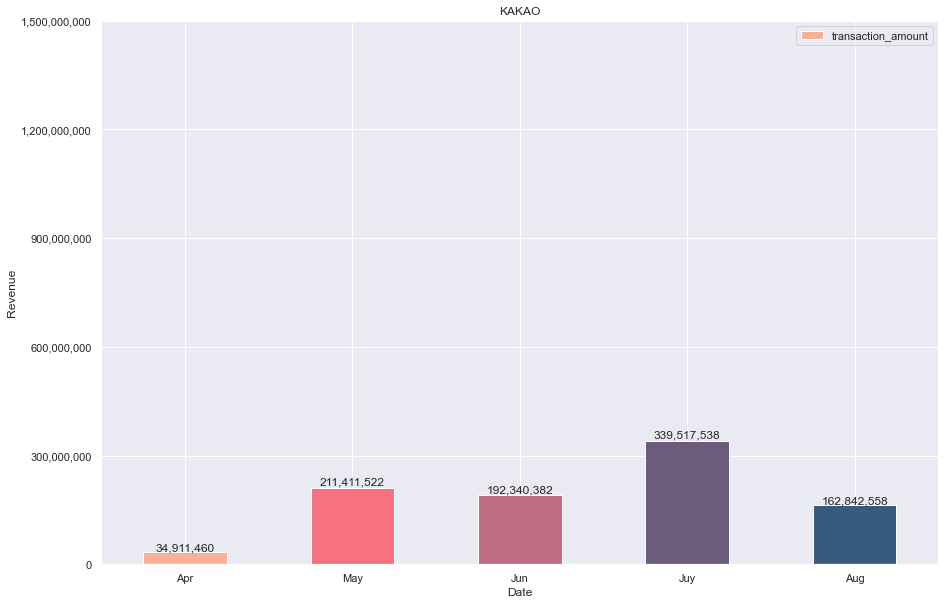

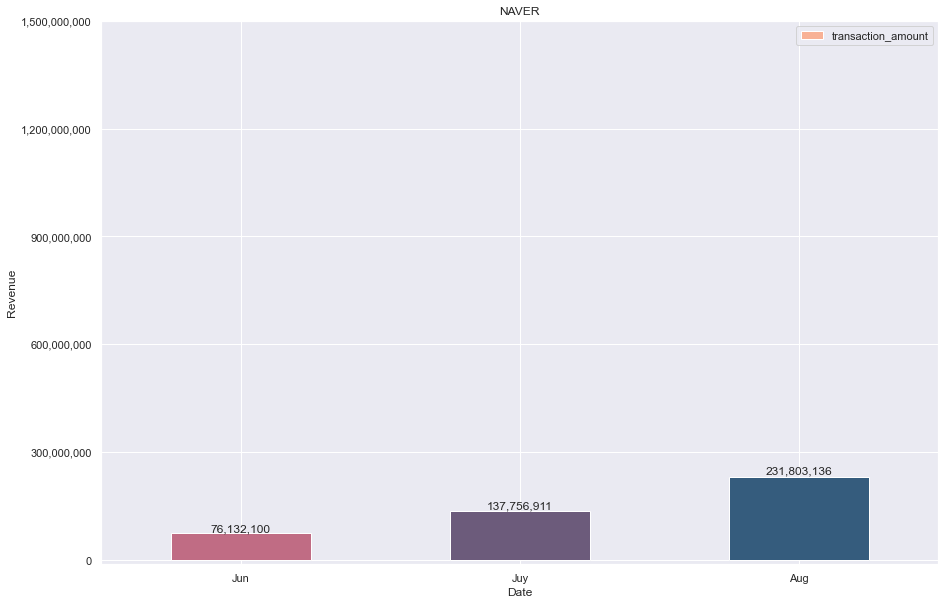

In [88]:
sns.set_theme(style="darkgrid")
my_colors = ['#F8B195', '#F8B195', '#F67280','#C06C84', '#6C5B7B', '#355C7D']

prc_m_g = prc_by_month_df.plot.bar(y='transaction_amount',
                                   title ='INICIS',                         
                                   rot=0,
                                   color=my_colors,
                                   figsize=(15,10)
                                  )
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 300000000, 600000000, 900000000, 1200000000 ,1500000000], 
           [0, '300,000,000', '600,000,000', '900,000,000' ,'1,200,000,000','1,500,000,000'])
plt.xlim(0.5,5.5)
plt.xticks([1, 2, 3 ,4 ,5 ], 
           ['Apr', 'May', 'Jun', 'Juy', 'Aug'])


for p in prc_m_g.patches:
    left, bottom, width, height = p.get_bbox().bounds
    prc_m_g.annotate(format(int(height), ','), (left+width/2, height*1.03), ha='center')

    
    
    
sns.set_theme(style="darkgrid")
my_colors = ['#3B70E3', '#F8B195', '#F67280','#C06C84', '#6C5B7B', '#355C7D']

prc_m_g = comm_prc_by_month_df.plot.bar(y='transaction_amount',
                                   title ='COMM',                         
                                   rot=0,
                                   color=my_colors,
                                   figsize=(15,10)
                                  )
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 300000000, 600000000, 900000000, 1200000000 ,1500000000], 
           [0, '300,000,000', '600,000,000', '900,000,000' ,'1,200,000,000','1,500,000,000'])
plt.xlim(-0.5 ,5.5)
plt.xticks([0, 1, 2, 3 ,4 ,5 ], 
           ['Mar','Apr', 'May', 'Jun', 'Juy', 'Aug'])


for p in prc_m_g.patches:
    left, bottom, width, height = p.get_bbox().bounds
    prc_m_g.annotate(format(int(height), ','), (left+width/2, height*1.2), ha='center')


sns.set_theme(style="darkgrid")
my_colors = ['#F8B195', '#F67280', '#C06C84','#6C5B7B', '#355C7D', '#F8B195']

prc_m_g = kakao_prc_by_month_df.plot.bar(y='transaction_amount',
                                   title ='KAKAO',                         
                                   rot=0,
                                   color=my_colors,
                                   figsize=(15,10)
                                  )
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 300000000, 600000000, 900000000, 1200000000 ,1500000000], 
           [0, '300,000,000', '600,000,000', '900,000,000' ,'1,200,000,000','1,500,000,000'])
plt.xlim(-0.5,4.5)
plt.xticks([0, 1, 2, 3 ,4 ], 
           ['Apr', 'May', 'Jun', 'Juy', 'Aug'])


for p in prc_m_g.patches:
    left, bottom, width, height = p.get_bbox().bounds
    prc_m_g.annotate(format(int(height), ','), (left+width/2, height*1.03), ha='center')

    

sns.set_theme(style="darkgrid")
my_colors = ['#F8B195', '#C06C84', '#6C5B7B','#355C7D', '#6C5B7B', '#355C7D']

prc_m_g = naver_prc_by_month_df.plot.bar(y='transaction_amount',
                                   title ='NAVER',                         
                                   rot=0,
                                   color=my_colors,
                                   figsize=(15,10)
                                  )
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.yticks([0, 300000000, 600000000, 900000000, 1200000000 ,1500000000], 
           [0, '300,000,000', '600,000,000', '900,000,000' ,'1,200,000,000','1,500,000,000'])
plt.xlim(0.5, 3.5)
plt.xticks([ 1, 2 ,3 ], 
           ['Jun', 'Juy', 'Aug'])


for p in prc_m_g.patches:
    left, bottom, width, height = p.get_bbox().bounds
    prc_m_g.annotate(format(int(height), ','), (left+width/2, height*1.03), ha='center')

    
    
    
    
plt.show()

In [89]:
pf_share = pd.DataFrame(prc.pg.value_counts())

# 고객그룹 분석

### OVERVIEW

In [92]:
# 결제 기록이있는 고객 수
cus_count = pd.DataFrame(prc.customer_id.value_counts())
total_cus = int(len(cus_count))

#### 평균 강의 구매 횟수

In [93]:
cus_count.customer_id.mean()

1.3917025296525665

### 구매횟수가 1회인 그룹과 나머지 그룹 비교

In [94]:
Buy_once = cus_count[cus_count.customer_id == 1].sum()
Buy_more = total_cus - Buy_once

In [95]:
Buy_more = total_cus - Buy_once

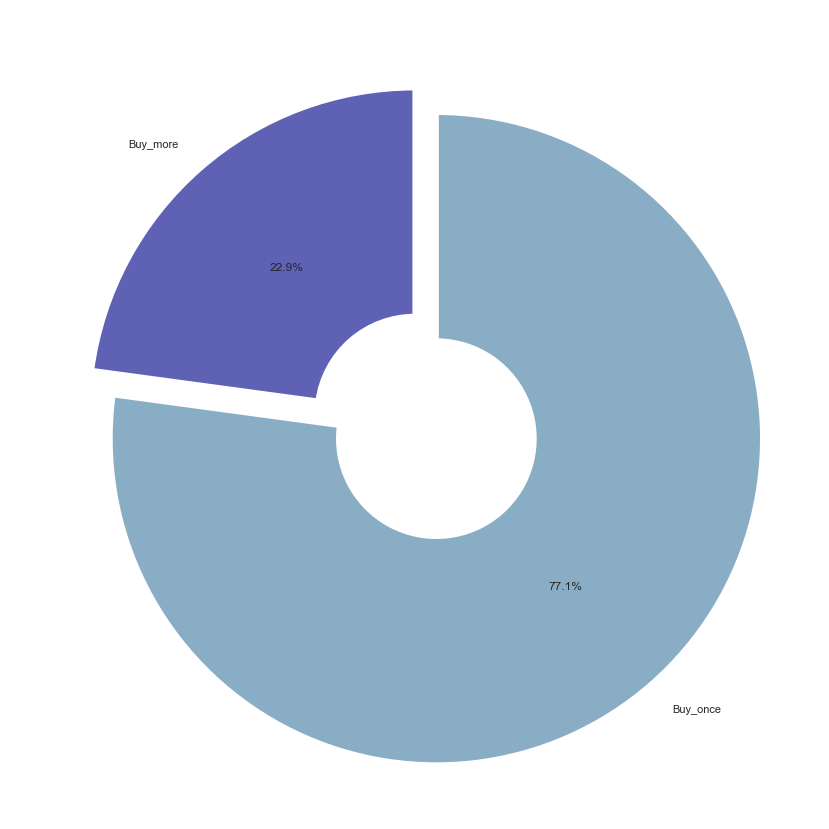

In [96]:
labels = ['Buy_once', 'Buy_more']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
explode = [0.10, 0]
colors = sns.color_palette("twilight")
cus_pie = [29397,8711]

plt.figure(figsize=(15,15))
plt.pie(cus_pie,
        labels = labels,
        autopct='%0.1f%%',
        counterclock=False,
        startangle= 90,
        explode = explode,
        wedgeprops=wedgeprops,
        colors = colors
       )
plt.show()


### VIP 그룹 정의


In [99]:
vvip_list = []
vvip = cus_count[cus_count.customer_id > 9]
for i in vvip.index:
    vvip_list.append(i)

vip_list = []
vip = cus_count[(cus_count.customer_id > 2) & (cus_count.customer_id < 10) ]
for i in vip.index:
    vip_list.append(i)

### VIP

In [100]:
# vip 고객 data
vip_df = prc[prc['customer_id'].isin(vip_list)].copy()

In [101]:
# vip 총 매출
total_rev_vip = vip_df.transaction_amount.sum()


In [ ]:
# vip 총 매출 대비 비중
round((total_rev_vip / total_rev * 100),2)

In [ ]:
# vvip 평균 인당 매출 금액
int(total_rev_vip / 2779)

### VVIP

In [104]:
# vvip 고객 data
vvip_df = prc[prc['customer_id'].isin(vvip_list)].copy()

In [ ]:
# 전체 고객 중 평균 인당 매출 금액
int(total_rev / 38108)

In [106]:
# vvip 총 매출
total_rev_vvip = vvip_df.transaction_amount.sum()


In [ ]:
# vvip 총 매출 대비 비중
round((total_rev_vvip / total_rev * 100),2)

In [ ]:
# vvip 평균 인당 매출 금액
int(total_rev_vvip / 88)

In [109]:
# 가장 많은 매출을 기록한 고객의 매출액
#prc.loc[prc.customer_id == 98685]
king_of_vip_rev = vvip_df[vvip_df.customer_id == 98685]['transaction_amount'].sum()


### VVIP + VIP

In [ ]:
# vvip + vip 총 매출 대비 비중
round(((total_rev_vvip + total_rev_vip) / total_rev * 100),2)

## VVIP, VIP  vs  일반고객 비교 


### 시간대별 활동율 비교

In [111]:
# lambda 함수를 이용해 시간만 뽑아서 그룹핑
vip_rev_by_hour = vip_df.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
total_tr = vip_rev_by_hour.transaction_amount.sum()
vip_rev_by_hour['vip_active_rate'] = round((vip_rev_by_hour.transaction_amount/total_tr * 100), 2)
vip_rev_by_hour_share_rate = vip_rev_by_hour.drop(columns=['transaction_amount'])


vvip_rev_by_hour = vvip_df.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
total_tr = vvip_rev_by_hour.transaction_amount.sum()
vvip_rev_by_hour['vvip_active_rate'] = round((vvip_rev_by_hour.transaction_amount/total_tr * 100), 2)
vvip_rev_by_hour_share_rate = vvip_rev_by_hour.drop(columns=['transaction_amount'])


rev_by_hour = prc.set_index('completed_at').groupby(lambda date: date.hour).sum()[['transaction_amount']]
total_tr = rev_by_hour.transaction_amount.sum()
rev_by_hour['avg_active_rate'] = round((rev_by_hour.transaction_amount/total_tr * 100), 2)
cus_rev_by_hour_share_rate = rev_by_hour.drop(columns=['transaction_amount'])


cus_active_rate = pd.concat([vip_rev_by_hour_share_rate,vvip_rev_by_hour_share_rate,cus_rev_by_hour_share_rate],axis=1)


### 그래프

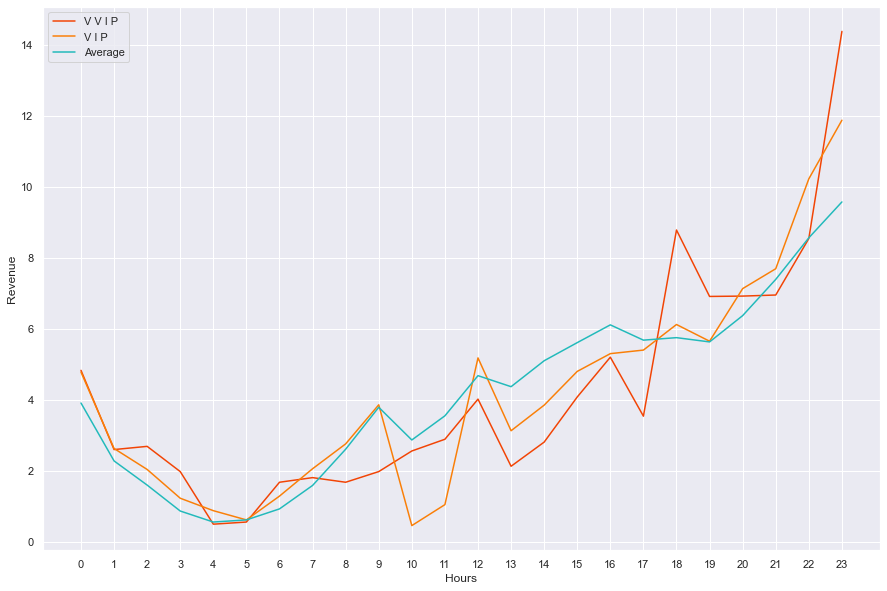

In [112]:
plt.figure(figsize=(15,10))
sns.set_theme(style="darkgrid")


plt.plot(vvip_rev_by_hour_share_rate,
         color = '#F24405',
         label = 'V V I P'
         
        )
plt.plot(vip_rev_by_hour_share_rate,
         color = '#FA7F08',
         label = 'V I P'
        )
plt.plot(cus_rev_by_hour_share_rate,
         color = '#22BABB',
         label = 'Average'
        )
plt.legend(loc='upper left')
plt.xticks([i for i in range(24)])
plt.xlabel('Hours')
plt.ylabel('Revenue')
plt.show()